<a href="https://colab.research.google.com/github/Apirol/Particle-size-analysis/blob/main/Diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Гранулометрический анализ керна по фотографии*** 

---



In [ ]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob

def get_deep_once(name):
  return os.path.splitext(name)[0].split('_')[1]

def get_deep(dir, ext)-> list:
  res = []
  filename_list = glob.glob(dir + '/*.' + ext)
  for path in filename_list:
    name = os.path.basename(path)
    res.append(float(get_deep_once(name)))
  return res

def get_dupes(filenames):
  filenames = sorted(filenames)
  seen = set()
  dupes = [float(x) for x in filenames if x in seen or seen.add(x)]
  return dupes

def crop_filename(file)-> list:
  cropped:str = file
  lenght = len(file)
  if file[0].isdigit() and file[1].isdigit():
    if file[lenght - 1] == '0' and file[lenght - 2]:
      cropped = file[3:lenght - 3]
    elif file[lenght - 1] == '0':
      cropped = file[3:lenght - 2]
    cropped = file[3:]
  elif file[0].isdigit():
    cropped = file[2:]
  return cropped.replace('.jpg', '')

# **Первичных анализ данных**




In [ ]:
data = pd.DataFrame()

In [ ]:
 length: int  = 0
 for i in range(0, 32):
        current_data = pd.read_csv(f'drive/MyDrive/Диплом/wells/{i}.csv')
        current_data['Well'] = i + 1
        data = data.append(current_data)
        length += current_data.shape[0]
length

1193

In [ ]:
data.head(50)

Unnamed: 0   0.001   0.005    0.01    0.04    0.05   0.063    0.08  \
0      2906.71  0.0367  0.0381  0.0223  0.0928  0.0100  0.0162  0.0385   
1      2908.42  0.0304  0.0267  0.0240  0.0721  0.0149  0.0272  0.0405   
2      2914.57  0.0333  0.0378  0.0358  0.0965  0.0205  0.0273  0.0477   
3      2916.06  0.0296  0.0187  0.0282  0.0911  0.0107  0.0338  0.0376   
4      2917.26  0.0334  0.0263  0.0305  0.0725  0.0182  0.0215  0.0368   
5      2920.39  0.0346  0.0276  0.0222  0.0911  0.0071  0.0307  0.0328   
6      2922.35  0.0306  0.0292  0.0235  0.1116  0.0171  0.0217  0.0394   
7      2925.90  0.0270  0.0339  0.0173  0.1237  0.0191  0.0391  0.0507   
8      2929.76  0.0345  0.0399  0.0410  0.0926  0.0203  0.0283  0.0402   
9      2982.37  0.0612  0.0693  0.0591  0.2567  0.0297  0.0733  0.1119   
10     2985.70  0.0439  0.0542  0.0368  0.1068  0.0096  0.0401  0.0396   
11     2988.95  0.0420  0.0534  0.0350  0.1052  0.0150  0.0268  0.0442   
12     2990.30  0.0413  0.0510  0.0347  0.1034  0.0179  0.0363  0.0407   
13     2992.74  0.0355  0.0556  0.0370  0.1238  0.0388  0.0338  0.0646   
14     2995.06  0.0302  0.0449  0.0358  0.1062  0.0179  0.0360  0.0423   
15     2997.48  0.0516  0.0731  0.0529  0.1698  0.0531  0.0575  0.1090   
16     2999.82  0.0437  0.0296  0.0334  0.0839  0.0126  0.0232  0.0267   
17     3000.61  0.0312  0.0442  0.0346  0.0933  0.0155  0.0143  0.0326   
18     3004.24  0.0577  0.0805  0.0668  0.2286  0.0391  0.0975  0.1572   
19     3006.36  0.0283  0.0428  0.0334  0.1325  0.0224  0.0297  0.0602   
20     3007.59  0.0324  0.0530  0.0328  0.1243  0.0260  0.0354  0.0618   
21     3010.69  0.0275  0.0472  0.0325  0.1246  0.0239  0.0424  0.0519   
22     3013.59  0.0267  0.0536  0.0375  0.1333  0.0316  0.0307  0.0573   
23     3016.32  0.0284  0.0509  0.0328  0.1125  0.0223  0.0368  0.0481   
24     3020.56  0.0313  0.0512  0.0364  0.1371  0.0198  0.0249  0.0590   
25     3023.84  0.0380  0.0508  0.0391  0.1227  0.0125  0.0365  0.0439   
26     3026.87  0.0419  0.0611  0.0482  0.1542  0.0183  0.0457  0.0811   
0      2787.66  0.0473  0.0713  0.0647  0.3490  0.1270  0.1494  0.1171   
1      2794.49  0.0311  0.0526  0.0410  0.3056  0.0990  0.1665  0.2035   
2      2798.87  0.0385  0.0534  0.0386  0.2053  0.0620  0.1027  0.1446   
3      2800.05  0.0363  0.0473  0.0266  0.1738  0.0387  0.0744  0.1311   
4      2803.09  0.0407  0.0417  0.0323  0.1312  0.0352  0.0601  0.0830   
5      2806.06  0.0336  0.0420  0.0342  0.1470  0.0366  0.0842  0.1513   
6      2809.02  0.0397  0.0447  0.0286  0.1199  0.0287  0.0512  0.0755   
7      2811.74  0.0357  0.0405  0.0318  0.1498  0.0334  0.0710  0.1393   
8      2913.46  0.0478  0.0441  0.0308  0.1383  0.0209  0.0418  0.0523   
9      2914.54  0.0478  0.0481  0.0278  0.1513  0.0195  0.0466  0.0712   
10     2915.72  0.0232  0.0247  0.0143  0.0573  0.0082  0.0203  0.0249   
11     2916.93  0.0250  0.0336  0.0162  0.0638  0.0128  0.0148  0.0346   
12     2919.43  0.0161  0.0395  0.0212  0.0615  0.0125  0.0306  0.0366   
13     2919.76  0.0162  0.0303  0.0151  0.0634  0.0092  0.0190  0.0302   
14     2920.85  0.0229  0.0299  0.0206  0.0666  0.0116  0.0292  0.0399   
15     2922.04  0.0177  0.0269  0.0179  0.0545  0.0119  0.0235  0.0435   
16     2925.41  0.0178  0.0263  0.0182  0.0774  0.0146  0.0295  0.0332   
17     2927.45  0.0139  0.0328  0.0139  0.0645  0.0119  0.0297  0.0495   
18     2929.42  0.0202  0.0259  0.0162  0.0673  0.0157  0.0281  0.0373   
19     2932.17  0.0207  0.0251  0.0153  0.0680  0.0137  0.0291  0.0692   
20     2935.21  0.0295  0.0435  0.0401  0.0996  0.0161  0.0401  0.0727   
21     2935.91  0.0262  0.0553  0.0412  0.1010  0.0173  0.0442  0.0567   
22     2937.98  0.0319  0.0467  0.0366  0.1125  0.0198  0.0411  0.0743   

       0.1   0.125  ...     0.4     0.5    0.63     0.8     1.0  1.25  1.6  \
0   0.0524  0.0879  ...  0.0002  0.0002  0.0001  0.0001  0.0001   0.0  0.0   
1   0.0734  0.1306  ...  0.0002  0.0001  0.0001  0.0000  0.0000   0.0  0.

In [ ]:
data.columns

Index(['Unnamed: 0', '0.001', '0.005', '0.01', '0.04', '0.05', '0.063', '0.08',
       '0.1', '0.125', '0.16', '0.2', '0.25', '0.315', '0.4', '0.5', '0.63',
       '0.8', '1.0', '1.25', '1.6', '2.0', '999.0', 'Well'],
      dtype='object')

In [ ]:
data = data.rename({'Unnamed: 0':'Deep'}, axis=1)
data = data.set_index('Deep')

In [ ]:
data

0.001   0.005    0.01    0.04    0.05   0.063    0.08     0.1  \
Deep                                                                      
2906.71  0.0367  0.0381  0.0223  0.0928  0.0100  0.0162  0.0385  0.0524   
2908.42  0.0304  0.0267  0.0240  0.0721  0.0149  0.0272  0.0405  0.0734   
2914.57  0.0333  0.0378  0.0358  0.0965  0.0205  0.0273  0.0477  0.0754   
2916.06  0.0296  0.0187  0.0282  0.0911  0.0107  0.0338  0.0376  0.0708   
2917.26  0.0334  0.0263  0.0305  0.0725  0.0182  0.0215  0.0368  0.0599   
...         ...     ...     ...     ...     ...     ...     ...     ...   
3245.94  0.0769  0.1070  0.0666  0.2738  0.0799  0.1112  0.1023  0.0739   
3246.33  0.0983  0.1420  0.0803  0.3542  0.0645  0.0853  0.0915  0.0410   
3247.61  0.0976  0.1407  0.0819  0.1926  0.0541  0.1056  0.1232  0.1054   
3248.51  0.0351  0.0541  0.0359  0.0921  0.0165  0.0299  0.0444  0.0480   
3249.38  0.0408  0.0682  0.0343  0.1112  0.0295  0.0312  0.0373  0.0478   

          0.125    0.16  ...     0.4     0.5    0.63     0.8     1.0  1.25  \
Deep                     ...                                                 
2906.71  0.0879  0.2181  ...  0.0002  0.0002  0.0001  0.0001  0.0001   0.0   
2908.42  0.1306  0.3112  ...  0.0002  0.0001  0.0001  0.0000  0.0000   0.0   
2914.57  0.1306  0.2328  ...  0.0002  0.0002  0.0001  0.0001  0.0002   0.0   
2916.06  0.1063  0.2355  ...  0.0003  0.0002  0.0001  0.0001  0.0001   0.0   
2917.26  0.1094  0.2213  ...  0.0004  0.0001  0.0001  0.0001  0.0002   0.0   
...         ...     ...  ...     ...     ...     ...     ...     ...   ...   
3245.94  0.0405  0.0295  ...  0.0027  0.0007  0.0003  0.0001  0.0003   0.0   
3246.33  0.0232  0.0113  ...  0.0002  0.0001  0.0000  0.0001  0.0001   0.0   
3247.61  0.0486  0.0273  ...  0.0006  0.0001  0.0001  0.0001  0.0002   0.0   
3248.51  0.0522  0.0822  ...  0.0166  0.0017  0.0004  0.0002  0.0003   0.0   
3249.38  0.0578  0.0983  ...  0.0100  0.0008  0.0002  0.0001  0.0002   0.0   

         1.6  2.0  999.0  Well  
Deep                            
2906.71  0.0  0.0    0.0     1  
2908.42  0.0  0.0    0.0     1  
2914.57  0.0  0.0    0.0     1  
2916.06  0.0  0.0    0.0     1  
2917.26  0.0  0.0    0.0     1  
...      ...  ...    ...   ...  
3245.94  0.0  0.0    0.0    32  
3246.33  0.0  0.0    0.0    32  
3247.61  0.0  0.0    0.0    32  
3248.51  0.0  0.0    0.0    32  
3249.38  0.0  0.0    0.0    32  

[1193 rows x 23 columns]

In [ ]:
data_float = data.iloc[:, 0:22]

### Понижение размерности отклика

**Имеет смысл сократить размерность отклика, т.к. для гранул размера больше 1 процентное соотношение очень маленькое**

In [ ]:
data_float_columns_1 = [col for col in data_float.columns if float(col) >= 1]
data_float_columns_005 = [col for col in data_float.columns if float(col) <= 0.05]
data_float_columns_002 = [col for col in data_float.columns if float(col) <= 0.2 and float(col) > 0.05]
data_float_columns_05_neg = [col for col in data_float.columns if float(col) <= 0.5 and float (col) > 0.2]
data_float_columns_05_pos = [col for col in data_float.columns if float(col) > 0.5 and float(col) < 1]
data_columns_drop = data_float_columns_1 + data_float_columns_005 + \
                              data_float_columns_002 + data_float_columns_05_neg + data_float_columns_05_pos

### Понижение размерности в первоначальном виде

In [ ]:
data_float['0.05<'] = data_float[data_float_columns_005].sum(axis=1)
data_float['0.05 : 0.2'] = data_float[data_float_columns_002].sum(axis=1)
data_float['0.2 : 0.5'] = data_float[data_float_columns_05_neg].sum(axis=1)
data_float['0.5 : 1'] = data_float[data_float_columns_05_pos].sum(axis=1)
data_float['1>'] = data_float[data_float_columns_1].sum(axis=1)
data_float = data_float.drop(data_columns_drop, axis=1)
data_float

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>
Deep                                                   
2906.71  0.1999      0.6896     0.1105   0.0002  0.0001
2908.42  0.1681      0.7986     0.0332   0.0001  0.0000
2914.57  0.2239      0.7471     0.0286   0.0002  0.0002
2916.06  0.1783      0.7722     0.0493   0.0002  0.0001
2917.26  0.1809      0.7669     0.0520   0.0002  0.0002
...         ...         ...        ...      ...     ...
3245.94  0.6042      0.3758     0.0194   0.0004  0.0003
3246.33  0.7393      0.2576     0.0030   0.0001  0.0001
3247.61  0.5669      0.4240     0.0086   0.0002  0.0002
3248.51  0.2337      0.3963     0.3689   0.0006  0.0003
3249.38  0.2840      0.4360     0.2796   0.0003  0.0002

[1193 rows x 5 columns]

**Сумма отклика должна быть равна 1**

In [ ]:
value = pd.DataFrame()
data_float['sum'] = data_float[data_float.columns].sum(axis=1)
data_float['sum'].mean()
data_float.head(20)

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>     sum
Deep                                                           
2906.71  0.1999      0.6896     0.1105   0.0002  0.0001  1.0003
2908.42  0.1681      0.7986     0.0332   0.0001  0.0000  1.0000
2914.57  0.2239      0.7471     0.0286   0.0002  0.0002  1.0000
2916.06  0.1783      0.7722     0.0493   0.0002  0.0001  1.0001
2917.26  0.1809      0.7669     0.0520   0.0002  0.0002  1.0002
2920.39  0.1826      0.7127     0.1047   0.0001  0.0001  1.0002
2922.35  0.2120      0.7335     0.0542   0.0002  0.0001  1.0000
2925.90  0.2210      0.7361     0.0426   0.0002  0.0001  1.0000
2929.76  0.2283      0.6248     0.1465   0.0003  0.0002  1.0001
2982.37  0.4760      0.5216     0.0022   0.0002  0.0002  1.0002
2985.70  0.2513      0.5088     0.2399   0.0001  0.0000  1.0001
2988.95  0.2506      0.5652     0.1842   0.0000  0.0000  1.0000
2990.30  0.2483      0.6018     0.1499   0.0001  0.0000  1.0001
2992.74  0.2907      0.6998     0.0093   0.0002  0.0001  1.0001
2995.06  0.2350      0.5639     0.2012   0.0001  0.0000  1.0002
2997.48  0.4005      0.5967     0.0025   0.0002  0.0001  1.0000
2999.82  0.2032      0.3292     0.4668   0.0005  0.0002  0.9999
3000.61  0.2188      0.3701     0.4113   0.0001  0.0000  1.0003
3004.24  0.4727      0.5234     0.0034   0.0002  0.0002  0.9999
3006.36  0.2594      0.7195     0.0209   0.0002  0.0002  1.0002

### Понижение размерности в куммулятивном виде

In [ ]:
data_float = data_float.cumsum(axis=1)

### Используемые для модели данные

**Используем только те строки в датафрейме, для которых есть данные**

In [ ]:
names = get_deep('drive/MyDrive/Диплом/img', 'jpg');
len(names)

1103

In [ ]:
filenames = [os.path.basename(file) for file in glob.glob('drive/MyDrive/Диплом/img' + '/*')]
filenames_cropped = [crop_filename(filename) for filename in filenames]
dupes = get_dupes(filenames_cropped)
dupes

[2470.95, 2705.12, 2731.14]

In [ ]:
prep_data_float = data_float.loc[data_float.index.isin(names)]
prep_data_float = prep_data_float.loc[~prep_data_float.index.isin(dupes)]
prep_data_float

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>     sum
Deep                                                           
2906.71  0.1999      0.8895     1.0000   1.0002  1.0003  2.0006
2908.42  0.1681      0.9667     0.9999   1.0000  1.0000  2.0000
2914.57  0.2239      0.9710     0.9996   0.9998  1.0000  2.0000
2916.06  0.1783      0.9505     0.9998   1.0000  1.0001  2.0002
2917.26  0.1809      0.9478     0.9998   1.0000  1.0002  2.0004
...         ...         ...        ...      ...     ...     ...
3245.94  0.6042      0.9800     0.9994   0.9998  1.0001  2.0002
3246.33  0.7393      0.9969     0.9999   1.0000  1.0001  2.0002
3247.61  0.5669      0.9909     0.9995   0.9997  0.9999  1.9998
3248.51  0.2337      0.6300     0.9989   0.9995  0.9998  1.9996
3249.38  0.2840      0.7200     0.9996   0.9999  1.0001  2.0002

[1097 rows x 6 columns]

In [ ]:
prep_data_weibull = data.loc[data.index.isin(names)]
prep_data_weibull = prep_data_weibull.loc[~prep_data_weibull.index.isin(dupes)]
prep_data_weibull = prep_data_weibull.cumsum(axis=1)
prep_data_weibull.drop('Well', axis=1, inplace=True)

In [ ]:
prep_data_weibull

0.001   0.005    0.01    0.04    0.05   0.063    0.08     0.1  \
Deep                                                                      
2906.71  0.0367  0.0748  0.0971  0.1899  0.1999  0.2161  0.2546  0.3070   
2908.42  0.0304  0.0571  0.0811  0.1532  0.1681  0.1953  0.2358  0.3092   
2914.57  0.0333  0.0711  0.1069  0.2034  0.2239  0.2512  0.2989  0.3743   
2916.06  0.0296  0.0483  0.0765  0.1676  0.1783  0.2121  0.2497  0.3205   
2917.26  0.0334  0.0597  0.0902  0.1627  0.1809  0.2024  0.2392  0.2991   
...         ...     ...     ...     ...     ...     ...     ...     ...   
3245.94  0.0769  0.1839  0.2505  0.5243  0.6042  0.7154  0.8177  0.8916   
3246.33  0.0983  0.2403  0.3206  0.6748  0.7393  0.8246  0.9161  0.9571   
3247.61  0.0976  0.2383  0.3202  0.5128  0.5669  0.6725  0.7957  0.9011   
3248.51  0.0351  0.0892  0.1251  0.2172  0.2337  0.2636  0.3080  0.3560   
3249.38  0.0408  0.1090  0.1433  0.2545  0.2840  0.3152  0.3525  0.4003   

          0.125    0.16  ...   0.315     0.4     0.5    0.63     0.8     1.0  \
Deep                     ...                                                   
2906.71  0.3949  0.6130  ...  0.9996  0.9998  1.0000  1.0001  1.0002  1.0003   
2908.42  0.4398  0.7510  ...  0.9996  0.9998  0.9999  1.0000  1.0000  1.0000   
2914.57  0.5049  0.7377  ...  0.9992  0.9994  0.9996  0.9997  0.9998  1.0000   
2916.06  0.4268  0.6623  ...  0.9993  0.9996  0.9998  0.9999  1.0000  1.0001   
2917.26  0.4085  0.6298  ...  0.9993  0.9997  0.9998  0.9999  1.0000  1.0002   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
3245.94  0.9321  0.9616  ...  0.9960  0.9987  0.9994  0.9997  0.9998  1.0001   
3246.33  0.9803  0.9916  ...  0.9996  0.9998  0.9999  0.9999  1.0000  1.0001   
3247.61  0.9497  0.9770  ...  0.9988  0.9994  0.9995  0.9996  0.9997  0.9999   
3248.51  0.4082  0.4904  ...  0.9806  0.9972  0.9989  0.9993  0.9995  0.9998   
3249.38  0.4581  0.5564  ...  0.9888  0.9988  0.9996  0.9998  0.9999  1.0001   

           1.25     1.6     2.0   999.0  
Deep                                     
2906.71  1.0003  1.0003  1.0003  1.0003  
2908.42  1.0000  1.0000  1.0000  1.0000  
2914.57  1.0000  1.0000  1.0000  1.0000  
2916.06  1.0001  1.0001  1.0001  1.0001  
2917.26  1.0002  1.0002  1.0002  1.0002  
...         ...     ...     ...     ...  
3245.94  1.0001  1.0001  1.0001  1.0001  
3246.33  1.0001  1.0001  1.0001  1.0001  
3247.61  0.9999  0.9999  0.9999  0.9999  
3248.51  0.9998  0.9998  0.9998  0.9998  
3249.38  1.0001  1.0001  1.0001  1.0001  

[1097 rows x 22 columns]

In [ ]:
deleted_data = data_float.loc[~data_float.index.isin(names)]
deleted_data = pd.concat([data_float.loc[data_float.index.isin(dupes)], deleted_data])
deleted_data

0.05<  0.05 : 0.2  0.2 : 0.5   0.5 : 1        1>       sum
Deep                                                                
2470.95  0.2547    0.986700   0.999800  1.000000  1.000000  2.000000
2705.12  0.3209    0.981700   0.999800  1.000000  1.000100  2.000200
2731.14  0.9347    0.998400   0.999600  0.999900  1.000100  2.000200
2705.12  0.2501    0.792766   0.999999  0.999999  0.999999  1.999998
2470.95  0.8938    0.998700   1.000100  1.000100  1.000100  2.000200
...         ...         ...        ...       ...       ...       ...
2830.28  0.3083    0.991000   0.998500  0.999300  1.000000  2.000000
2970.03  0.3227    0.936900   0.999600  0.999900  1.000000  2.000000
2976.03  0.2612    0.939000   0.999200  0.999800  1.000000  2.000000
2982.97  0.3460    0.954400   0.999600  0.999800  0.999900  1.999800
2988.02  0.5769    0.996800   1.000100  1.000200  1.000200  2.000400

[96 rows x 6 columns]

### Сохранение отклика для модели

In [ ]:
prep_data_float.to_csv('drive/MyDrive/Диплом/output.csv')

In [ ]:
prep_data_weibull.to_csv('drive/MyDrive/Диплом/weibull_data.csv')

In [ ]:
deleted_data.to_csv('drive/MyDrive/Диплом/deleted_data.csv')

### График распределения отклика

In [ ]:
data_to_graph = pd.read_csv('drive/MyDrive/Диплом/weibull_data.csv')
data_to_graph.set_index("Deep", inplace=True)

In [ ]:
data_to_graph.head()

0.001   0.005    0.01    0.04    0.05   0.063    0.08     0.1  \
Deep                                                                      
2906.71  0.0367  0.0748  0.0971  0.1899  0.1999  0.2161  0.2546  0.3070   
2908.42  0.0304  0.0571  0.0811  0.1532  0.1681  0.1953  0.2358  0.3092   
2914.57  0.0333  0.0711  0.1069  0.2034  0.2239  0.2512  0.2989  0.3743   
2916.06  0.0296  0.0483  0.0765  0.1676  0.1783  0.2121  0.2497  0.3205   
2917.26  0.0334  0.0597  0.0902  0.1627  0.1809  0.2024  0.2392  0.2991   

          0.125    0.16  ...   0.315     0.4     0.5    0.63     0.8     1.0  \
Deep                     ...                                                   
2906.71  0.3949  0.6130  ...  0.9996  0.9998  1.0000  1.0001  1.0002  1.0003   
2908.42  0.4398  0.7510  ...  0.9996  0.9998  0.9999  1.0000  1.0000  1.0000   
2914.57  0.5049  0.7377  ...  0.9992  0.9994  0.9996  0.9997  0.9998  1.0000   
2916.06  0.4268  0.6623  ...  0.9993  0.9996  0.9998  0.9999  1.0000  1.0001   
2917.26  0.4085  0.6298  ...  0.9993  0.9997  0.9998  0.9999  1.0000  1.0002   

           1.25     1.6     2.0   999.0  
Deep                                     
2906.71  1.0003  1.0003  1.0003  1.0003  
2908.42  1.0000  1.0000  1.0000  1.0000  
2914.57  1.0000  1.0000  1.0000  1.0000  
2916.06  1.0001  1.0001  1.0001  1.0001  
2917.26  1.0002  1.0002  1.0002  1.0002  

[5 rows x 22 columns]

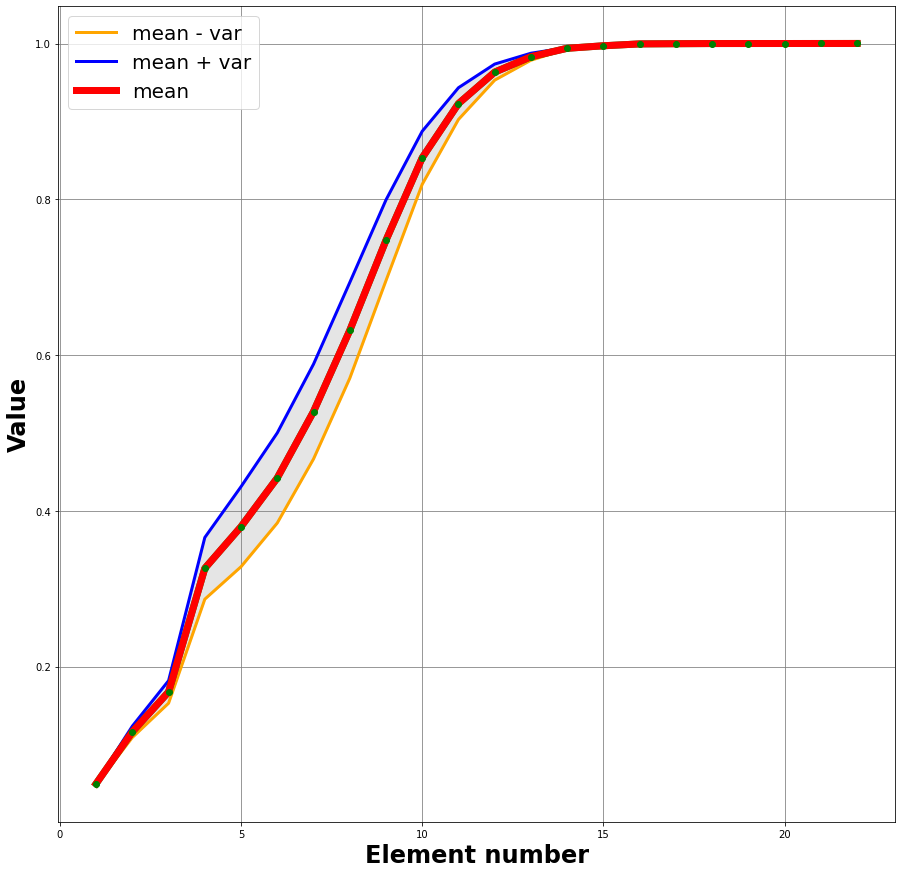

In [ ]:
plt.figure(figsize=(15, 15))
plt.xlabel('Element number', fontsize=24,fontweight='bold')
plt.ylabel('Value', fontsize=24, fontweight='bold')
x = np.linspace(1, 22, 22)
y = np.array([data_to_graph[column].mean() for column in data_to_graph.columns])
error = data_to_graph.var(axis=0).values
plt.fill_between(x, y-error, y+error, color='gray', alpha=0.2)
plt.plot(x, y-error, '-',color='orange', label="mean - var", lw=3)
plt.plot(x, y+error, '-',color='blue', label="mean + var", lw=3)
plt.plot(x, y, '-', color='green', lw=7, alpha=0.9);
plt.plot(x, y, 'r', lw=7, label='mean')
plt.plot(x, y, 'og', lw=7)
plt.grid(color='grey')
plt.legend(prop={'size': 20});

# **Первичная обработка изображений**

### Считываем изображение

In [ ]:
from skimage.io import imread, imshow, imsave

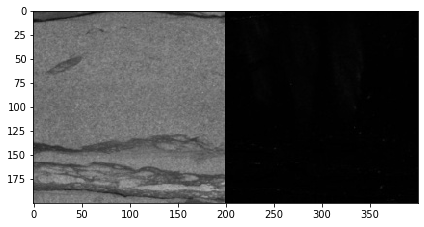

In [ ]:
image1 = imread('drive/MyDrive/Диплом/img/0_2908.4200.jpg', as_gray=True)
imshow(image1);

In [ ]:
np.shape(image1)

(200, 400)

### Считываем все остальные изображения

In [ ]:
import glob
image_list = []
filename_list = glob.glob('drive/MyDrive/Диплом/img/*.jpg')

In [ ]:
image_list = []
for filename in filename_list:
    image = imread(filename, as_gray=True)
    image_list.append(image)

In [ ]:
np.shape(image_list)

(1103, 200, 400)

### Уберем ультрафиолет для каждого изображения

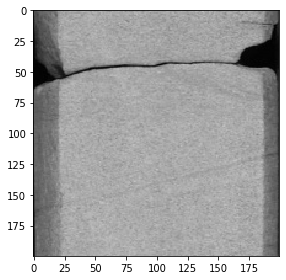

In [ ]:
for i, image in enumerate(image_list):
  image_list[i] = image[0:200, 0:200]
imshow(image_list[1]);

### Функция сохранения изображений

In [ ]:
def save_images(image_list, filename_list):
  for i, image in enumerate(image_list):
    imsave(filename_list[i], image_list[i])

def change_dir(old, new)-> list:
  return [filename.replace(old, new) for filename in filename_list]

#### Сохранение обрезанных изображений

In [ ]:
cropped_filename_list = change_dir('img', 'img_cropped')
cropped_filename_list[0]

'drive/MyDrive/Диплом/img_cropped/10_2753.1900.jpg'

In [ ]:
save_images(image_list, cropped_filename_list);

### Выполним бинаризацию изображения методом Оцу

In [ ]:
from skimage import filters

otsu = filters.threshold_otsu(image_list[0])
binary = image_list[0] > otsu

imshow(binary, cmap='gray', aspect='auto');

**Изображение, обработанные фильтрмо Собеля могут быть полезны для извлечения признаков**

### Применим бинаризацию для каждого изображения

In [ ]:
otsu_list = []
for i, image in enumerate(image_list):
  otsu = filters.threshold_otsu(image_list[i])
  binary = image > otsu
  otsu_list.append(np.array(binary).astype('float64'))

#### Сохранение изображений с бинаризацией

In [ ]:
otsu_filename_list = change_dir('img_cropped', 'img_otsu')

In [ ]:
save_images(otsu_list, otsu_filename_list)

# **Выделение признаков из изображений**

## **Выделим из изображения простые статистические признаки**

In [ ]:
def mad(data):
    return np.mean(np.absolute(data - np.mean(data)))

In [ ]:
def get_list_of_statistic(img: np.array, deep)-> list:
  return [float(deep), np.mean(img), np.median(img), np.quantile(img, 0.25),
          np.quantile(img, 0.75), np.quantile(img, 0.75) - np.quantile(img, 0.25), 
          np.var(img), mad(img)]

In [ ]:
def get_statistic_signs(image_list: list, filename_list)->list:
  return [get_list_of_statistic(image, get_deep_once(os.path.basename(filename_list[i]))) for i, image in enumerate(image_list)]

### Статистические признаки для обычных изображений

In [ ]:
filename_list = glob.glob('drive/MyDrive/Диплом/img_cropped/*.jpg')
image_list = []
for filename in filename_list: 
    image = imread(filename, as_gray=True)
    image_list.append(image)

In [ ]:
signs_common = get_statistic_signs(image_list, filename_list)
signs_common[:5]

[[2251.46, 161.0141, 173.0, 164.0, 179.0, 15.0, 1127.97700119, 22.93779402],
 [1971.71,
  125.475325,
  135.0,
  130.0,
  139.0,
  9.0,
  873.8713411443752,
  18.25498414625],
 [1966.77,
  149.045775,
  156.0,
  146.0,
  161.0,
  15.0,
  446.052329649375,
  15.010254430000003],
 [2257.75,
  168.070675,
  181.0,
  173.0,
  185.0,
  12.0,
  1127.7700800443752,
  22.390694946250004],
 [2251.24,
  150.087525,
  159.0,
  149.0,
  166.0,
  17.0,
  739.925864374375,
  19.18740690875]]

### Статистические признаки для изображений с бинаризацией

In [ ]:
signs_otsu = get_statistic_signs(otsu_list, filename_list)

### Сохраним признаки

In [ ]:
np.savetxt("drive/MyDrive/Диплом/common_statistic.csv", signs_common,delimiter=",")

In [ ]:
np.savetxt("drive/MyDrive/Диплом/otsu_statistic.csv", signs_otsu, delimiter=",")

## **Выделим из изображений признаки Харалика**

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte


def get_glcm(image, distances, angles):
  return greycomatrix(image, 
                    distances=distances, 
                    angles=angles,
                    symmetric=True,
                    normed=True)

def get_haralick_feauture(glcm, deep)-> list:
  res = []
  res.append(float(deep))
  properties = ['contrast', 'energy', 'homogeneity', 'correlation', 'dissimilarity']
  for prop in properties:
    res.extend(greycoprops(glcm, prop).mean(axis=1))
  return res

def get_haralick_feautures(list_images, filename_list, distances=[1,2,3], 
                           angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])-> list:
  res = []
  for i, image in enumerate(list_images):
    glcm = get_glcm(image, distances, angles)
    res.append(get_haralick_feauture(glcm, get_deep_once(os.path.basename(filename_list[i]))))
  return res

In [ ]:
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

### Признаки Харалика для обычных изображений

In [ ]:
haralick_common = get_haralick_feautures(image_list, filename_list)

In [ ]:
haralick_common[:20]
np.shape(haralick_common)

(1103, 16)

In [ ]:
np.savetxt("drive/MyDrive/Диплом/haralick_common.csv", haralick_common, delimiter=",")

## **Выделим Ху-моменты изображений**

In [ ]:
from skimage import measure
def get_moments(image, deep)->list:
  moments_central = measure.moments_central(image)
  moments_norm = measure.moments_normalized(moments_central)
  hu_moments = measure.moments_hu(moments_norm).tolist()
  hu_moments.insert(0, float(deep))
  return hu_moments

def get_list_moments(image_list, filename_list)->list:
  return [get_moments(image, get_deep_once(os.path.basename(filename_list[i]))) for i, image in enumerate(image_list)]

In [ ]:
hu_moments = get_list_moments(image_list, filename_list)
hu_moments

### Сохраним Ху-моменты

In [ ]:
np.savetxt("drive/MyDrive/Диплом/hu_moments.csv", hu_moments, delimiter=",")

## **Выделим из изображений признаки на основе вейвлета Хаара**

In [ ]:
import pywt
def get_wavelet(image, deep, num_levels=8):
  (cA, (cH, cV, cD)) = pywt.dwt2(image, wavelet='haar')
  features = [np.mean(cA), np.mean(cH), np.mean(cV), np.mean(cD)]
  for l in range(0, num_levels):
    (cA, (cH, cV, cD)) = pywt.dwt2(cA, wavelet='haar')
    imshow(cA)
    features.append(np.mean(cA))
  features.insert(0, float(deep))
  return features

def get_wavelet_list(image_list, filename_list)->list:
  return [get_wavelet(image, get_deep_once(os.path.basename(filename_list[i]))) for i, image in enumerate(image_list)]

In [ ]:
wavelet_list = get_wavelet_list(image_list, filename_list)
wavelet_list[:20]

### Сохраним вейвлет-признаки

In [ ]:
np.savetxt("drive/MyDrive/Диплом/wavelet.csv", wavelet_list, delimiter=",",)

# Подготовка признаков для моделей

### Зададим имена столбцов 

In [ ]:
stat_names = ['Deep', 'mean', 'median', 'q2', 'q7', 'inter_q', 'var', 'mad'] 
haralick_names = ['Deep', 'cont1', 'cont2', 'cont3',
                  'en1', 'en2', 'en3', 
                  'hom1', 'hom2', 'hom3',
                  'corr1', 'corr2', 'corr3',
                  'diss1', 'diss2', 'diss3',]
hu_names = ['Deep', 'hu1','hu2','hu3','hu4','hu5','hu6','hu7',]
wavelet_names = ['Deep', 'w1', 'w2','w3','w4','w5','w6','w7','w8','w9','w10','w11','w12',]

In [ ]:
df_stat = pd.read_csv("drive/MyDrive/Диплом/common_statistic.csv", names=stat_names)
df_stat = df_stat.set_index('Deep')
df_stat = df_stat.sort_index()
df_stat

mean  median     q2     q7  inter_q         var        mad
Deep                                                                     
1180.52  111.647600   108.0   97.0  125.0     28.0  345.395064  15.410578
1180.69  101.529925    98.0   88.0  111.0     23.0  372.167104  14.136174
1183.90   65.511800    65.0   59.0   73.0     14.0  142.905311   8.554208
1185.45  132.320025   135.0  119.0  147.0     28.0  393.229359  16.045968
1187.42  125.639950   130.0  107.0  144.0     37.0  492.463014  19.022594
...             ...     ...    ...    ...      ...         ...        ...
3833.08  190.113000   190.0  188.0  192.0      4.0   13.975931   2.751092
3834.61  185.022350   190.0  187.0  193.0      6.0  704.493300  10.616258
3835.20  175.819425   177.0  173.0  180.0      7.0   54.199968   5.031527
3843.44  190.858975   195.0  185.0  201.0     16.0  198.833987  10.767044
3844.34  162.434375   162.0  156.0  169.0     13.0   87.876693   7.516204

[1103 rows x 7 columns]

In [ ]:
df_haralick = pd.read_csv("drive/MyDrive/Диплом/haralick_common.csv", names=haralick_names)
df_haralick = df_haralick.set_index('Deep')
df_haralick = df_haralick.sort_index()
df_haralick

cont1       cont2       cont3  ...     diss1     diss2      diss3
Deep                                        ...                               
1180.52  76.946473  114.835319  198.338954  ...  6.226728  7.700242  10.190026
1180.69  60.856043   94.750852  168.633429  ...  5.436620  6.787250   8.902966
1183.90  24.331330   38.190299   69.702255  ...  3.343518  4.198612   5.568464
1185.45  81.984677  129.085919  230.503717  ...  6.588027  8.310416  11.138097
1187.42  63.483051   97.144929  165.297952  ...  5.687263  7.088181   9.252708
...            ...         ...         ...  ...       ...       ...        ...
3833.08   6.525955    9.486166   13.577135  ...  1.832450  2.284020   2.779545
3834.61  47.087585   78.792424  164.453990  ...  2.704358  3.423653   4.580096
3835.20   9.703169   15.403525   28.058099  ...  2.068216  2.620645   3.418934
3843.44  28.888944   44.247187   75.937304  ...  3.630212  4.557712   5.975699
3844.34  20.512627   30.128186   44.281654  ...  3.216351  3.961582   4.874420

[1103 rows x 15 columns]

In [ ]:
df_hu = pd.read_csv("drive/MyDrive/Диплом/hu_moments.csv", names=hu_names)
df_hu = df_hu.set_index('Deep')
df_hu = df_hu.sort_index()
df_hu

hu1           hu2  ...           hu6           hu7
Deep                             ...                            
1180.52  0.001499  8.574068e-10  ...  6.947312e-17  1.121789e-23
1180.69  0.001727  2.309275e-10  ... -1.780728e-17 -8.051429e-25
1183.90  0.002563  4.224764e-09  ... -8.604915e-16  4.710344e-23
1185.45  0.001252  1.270202e-10  ... -1.583459e-18 -5.741608e-27
1187.42  0.001277  1.547136e-09  ... -1.836167e-16 -1.420434e-24
...           ...           ...  ...           ...           ...
3833.08  0.000877  2.561581e-11  ... -2.605124e-21  2.382871e-30
3834.61  0.000878  1.179040e-09  ... -3.224094e-19  4.969398e-27
3835.20  0.000953  9.458607e-11  ... -3.226694e-19 -5.174570e-28
3843.44  0.000865  1.172795e-11  ... -6.904200e-20 -1.885093e-27
3844.34  0.001033  1.710177e-10  ...  2.986781e-18 -2.407002e-26

[1103 rows x 7 columns]

In [ ]:
df_wave = pd.read_csv("drive/MyDrive/Диплом/wavelet.csv", names=wavelet_names)
df_wave = df_wave.set_index('Deep')
df_wave = df_wave.sort_index()
df_wave

w1       w2       w3  ...           w10           w11           w12
Deep                                  ...                                          
1180.52  223.29520  0.23340  0.07050  ...  13971.169922  27942.339844  55884.679688
1180.69  203.05985  0.08825  0.37875  ...  13198.212891  26396.425781  52792.851563
1183.90  131.02360  0.06420 -0.20060  ...   8457.396484  16914.792969  33829.585938
1185.45  264.64005  0.12665 -0.09385  ...  17009.964844  34019.929688  68039.859375
1187.42  251.27990  0.06320  0.27030  ...  15556.578125  31113.156250  62226.312500
...            ...      ...      ...  ...           ...           ...           ...
3833.08  380.22600  0.00920  0.01220  ...  24080.546875  48161.093750  96322.187500
3834.61  370.04470 -0.59470 -0.02210  ...  23720.027344  47440.054688  94880.109375
3835.20  351.63885 -0.01985  0.03345  ...  22371.554688  44743.109375  89486.218750
3843.44  381.71795 -0.02085 -0.00425  ...  24172.992188  48345.984375  96691.968750
3844.34  324.86875 -0.03375 -0.07925  ...  21124.501953  42249.003906  84498.007813

[1103 rows x 12 columns]

In [ ]:
df_signs = pd.concat([df_wave, df_stat, df_hu, df_haralick], axis=1)
df_signs

w1       w2       w3  ...     diss1     diss2      diss3
Deep                                  ...                               
1180.52  223.29520  0.23340  0.07050  ...  6.226728  7.700242  10.190026
1180.69  203.05985  0.08825  0.37875  ...  5.436620  6.787250   8.902966
1183.90  131.02360  0.06420 -0.20060  ...  3.343518  4.198612   5.568464
1185.45  264.64005  0.12665 -0.09385  ...  6.588027  8.310416  11.138097
1187.42  251.27990  0.06320  0.27030  ...  5.687263  7.088181   9.252708
...            ...      ...      ...  ...       ...       ...        ...
3833.08  380.22600  0.00920  0.01220  ...  1.832450  2.284020   2.779545
3834.61  370.04470 -0.59470 -0.02210  ...  2.704358  3.423653   4.580096
3835.20  351.63885 -0.01985  0.03345  ...  2.068216  2.620645   3.418934
3843.44  381.71795 -0.02085 -0.00425  ...  3.630212  4.557712   5.975699
3844.34  324.86875 -0.03375 -0.07925  ...  3.216351  3.961582   4.874420

[1103 rows x 41 columns]

### Сохранение признаков

In [ ]:
df_signs.to_csv('drive/MyDrive/Диплом/signs.csv')

# Модели для решения задачи

In [ ]:
from sklearn.metrics import mean_squared_error
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from numpy import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Фукнция для вычисление ошибки

In [ ]:
def get_single_error(predict, true)->int:
  res:int = 0
  for i in range(len(predict)):
    current = predict[i] - true[i]
    if current > res:
      res = current
  return res

def get_error(predict_list, true_list)->int:
  res:int = 0
  for i in range(len(predict_list)):
    res += get_single_error(predict_list[i], true_list[i])
  return res / len(predict_list)

In [ ]:
from math import sqrt
def get_single_error_sq(predict, true)->int:
  res:int = 0
  for i in range(len(predict)):
    current = predict[i] - true[i]
    if current > res:
      res = current
  return res

def get_error_squad(predict_list, true_list)->int:
  res:int = 0
  for i in range(len(predict_list)):
    res += get_single_error(predict_list[i], true_list[i])**2 
  return sqrt(res / len(predict_list))

## Функции графиков для отклика

In [ ]:
def draw_residuals(predicted, true):
  shape = np.shape(true)
  fig = plt.figure(figsize=(20, 15))
  fig.suptitle('RESIDUALS', fontsize=16)
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  for i in range(shape[1]):
    ax = fig.add_subplot(2, 3, i + 1)
    current_percentile_predict = []
    current_percentile_true = []
    for j in range(shape[0]):
      current_percentile_predict.append(predicted[j][i])
      current_percentile_true.append(true[j][i])
    ax.plot(current_percentile_true, 
            np.array(current_percentile_true) - np.array(current_percentile_predict), 'o')
    ax.title.set_text(f'{i}-output')
  plt.show();


def draw_distribution(df_true_pred):
  shape = np.shape(df_true_pred)
  fig = plt.figure(figsize=(20, 15))
  fig.suptitle('OUTPUT DISTRIBUTION', fontsize=16)
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  for i in range(int(shape[1] / 2)):
    ax = fig.add_subplot(2, 3, i + 1)
    df_out = df_true_pred[[df_true_pred.columns[i], 
                           df_true_pred.columns[i] + ' pred']].sort_values(by=df_true_pred.columns[i], ignore_index=True)
    ax.plot(df_out[df_out.columns[0]], 'o', label=f'True {i + 1}-output', linewidth=5.0)
    ax.plot(df_out[df_out.columns[0] + ' pred'], 'o', label=f'Predicted {i + 1}-output', linewidth=5.0)
    ax.title.set_text(f'{i + 1}-output')
    ax.legend()
  plt.show();

## Чтение отклика и признаков

In [ ]:
df_signs = pd.read_csv('drive/MyDrive/Диплом/signs.csv')
output = pd.read_csv('drive/MyDrive/Диплом/output.csv')
filenames = [os.path.basename(file) for file in glob.glob('drive/MyDrive/Диплом/img' + '/*')]
filenames_cropped = [crop_filename(filename) for filename in filenames]
dupes = get_dupes(filenames_cropped)
if 'sum' in output.columns:
  output = output.drop('sum', axis=1)
output = output.set_index('Deep')
output = output.sort_index()
df_signs = df_signs.set_index('Deep')
df_signs = df_signs.loc[~df_signs.index.isin(dupes)]
output

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>
Deep                                                   
1180.52  0.6902      0.9967     0.9988   0.9996  1.0002
1180.69  0.4404      0.9861     0.9986   0.9998  1.0003
1183.90  0.2647      0.8812     0.9910   0.9942  1.0000
1185.45  0.2424      0.9930     0.9971   0.9984  1.0003
1187.42  0.1839      0.9891     0.9990   0.9998  1.0000
...         ...         ...        ...      ...     ...
3833.08  0.3335      0.9842     0.9996   0.9998  1.0001
3834.61  0.3119      0.9819     0.9998   1.0000  1.0001
3835.20  0.3541      0.9900     0.9994   0.9997  0.9999
3843.44  0.4104      0.9939     0.9966   0.9972  1.0001
3844.34  0.3637      0.9951     0.9995   0.9998  1.0001

[1097 rows x 5 columns]

In [ ]:
df_signs.describe

<bound method NDFrame.describe of                 w1       w2       w3       w4        w5         w6  \
Deep                                                                 
1180.52  223.29520  0.23340  0.07050  0.00830  446.5904   893.1808   
1180.69  203.05985  0.08825  0.37875  0.00715  406.1197   812.2394   
1183.90  131.02360  0.06420 -0.20060  0.00480  262.0472   524.0944   
1185.45  264.64005  0.12665 -0.09385 -0.00365  529.2801  1058.5602   
1187.42  251.27990  0.06320  0.27030  0.00540  502.5598  1005.1196   
...            ...      ...      ...      ...       ...        ...   
3833.08  380.22600  0.00920  0.01220  0.00040  760.4520  1520.9040   
3834.61  370.04470 -0.59470 -0.02210 -0.00450  740.0894  1480.1788   
3835.20  351.63885 -0.01985  0.03345  0.00335  703.2777  1406.5554   
3843.44  381.71795 -0.02085 -0.00425  0.00075  763.4359  1526.8718   
3844.34  324.86875 -0.03375 -0.07925 -0.00335  649.7375  1299.4750   

                  w7           w8            w9        

## Разделение выборки и функции для валидации

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_signs, 
                                                    output, test_size=0.30, 
                                                    random_state=101)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(767, 41) (330, 41) (767, 5) (330, 5)


In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, fit=True):
  if fit:
    model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  prediction_df = pd.DataFrame(prediction)
  prediction_df = prediction_df.set_index(y_test.index.values)
  prediction_df.columns = [name + ' pred' for name in y_test.columns]
  df_out = pd.concat([y_test, prediction_df], axis=1)
  error = get_error(prediction, y_train.values.tolist())
  return model, df_out, prediction, error

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer

def error_multi(y_pred, y_true):
  return mean_squared_error(y_pred, y_true, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)

def cross_validation(model, X_test, y_test) -> int:
  error:int = -1
  cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
  custom_scorer = make_scorer(error_multi, greater_is_better=False)
  scores = cross_val_score(model, X_test, y_test, scoring=custom_scorer, cv=cv, n_jobs=-1)
  return scores

## REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


reg = LinearRegression()
model = RFE(reg, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

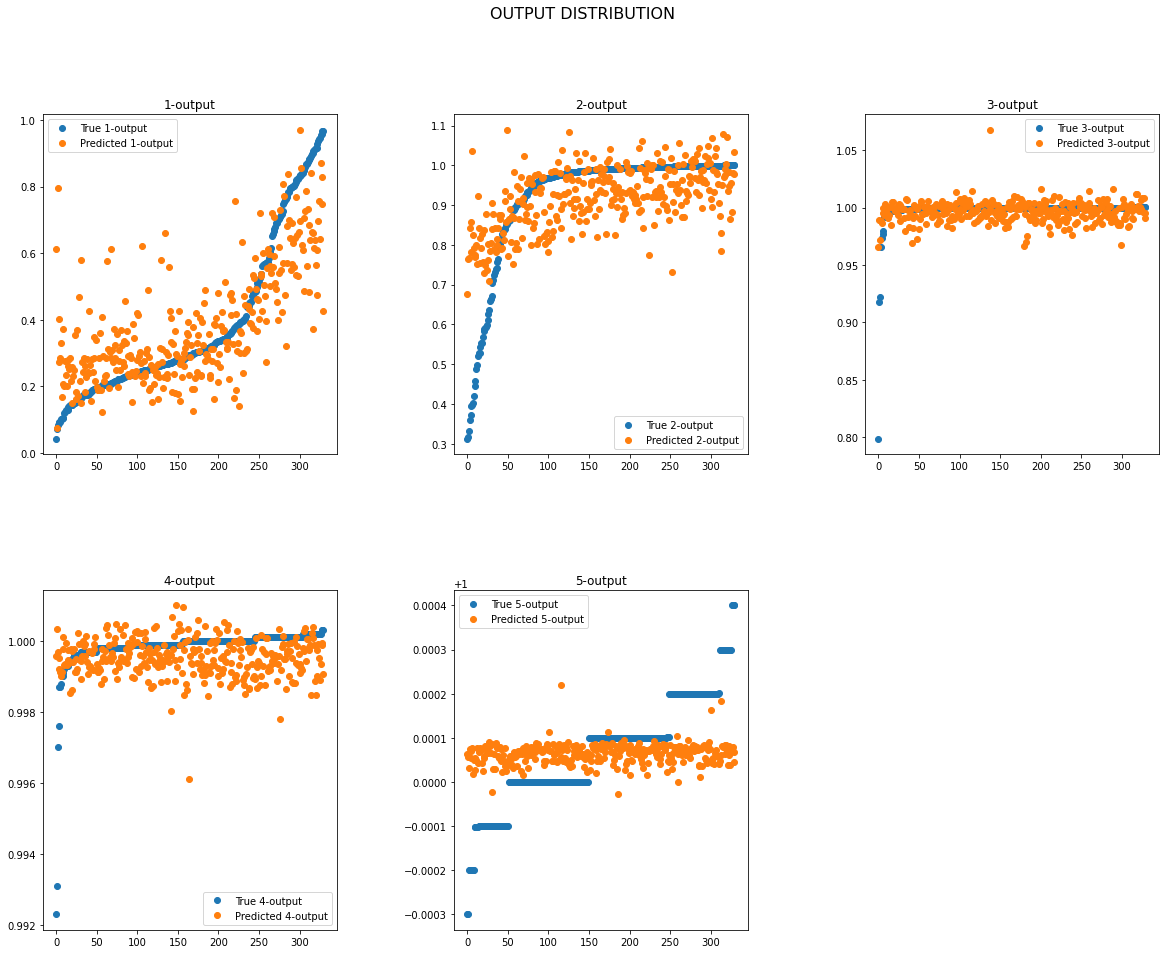

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.2012679249272435
Error is 0.14682316677887136
RMSE is 0.10533585566865229)


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation MSE {abs(mean(cv))}")

Scores of k-block: [0.37162324 0.11705213 0.09627725 0.10375994 0.11007572]
Cross validation MSE 0.15975765420674218


In [ ]:
from sklearn.linear_model import MultiTaskLasso

lasso = MultiTaskLasso()
model = RFE(lasso, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]
model, df_out, prediction, error = train_model(lasso, X_train_new, y_train, X_test_new, y_test)

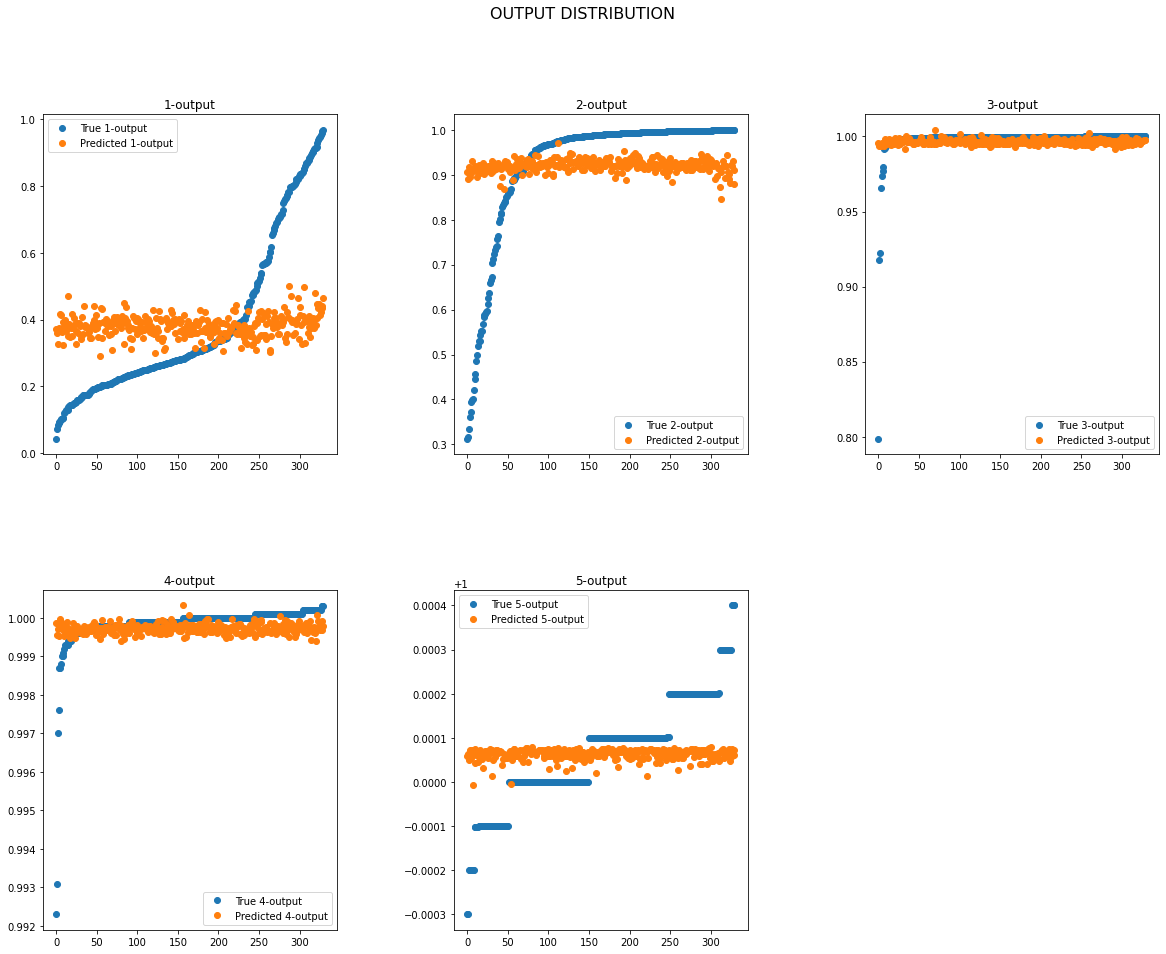

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.01714047803850658
Error is 0.11616899498961078
RMSE is 0.14212492951656203)


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [0.14494332 0.14231323 0.12154453 0.13856239 0.13574065]
Cross validation RMSE 0.13662082357420824


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
model = RFE(ridge, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]
model, df_out, prediction, error = train_model(lasso, X_train_new, y_train, X_test_new, y_test)

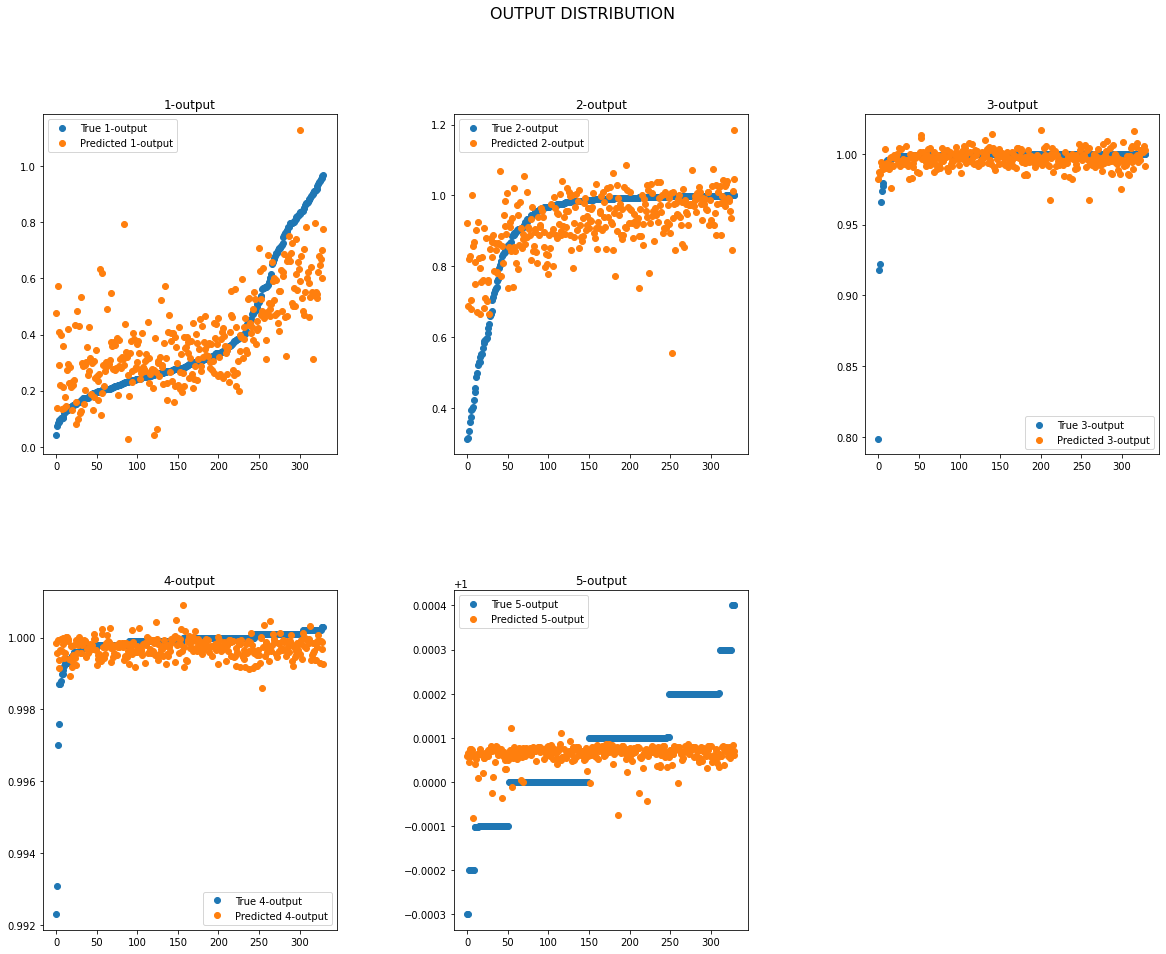

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.012214218833836
Error is 0.11640212199053264
RMSE is 0.14279795005171303)


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [0.14483787 0.14272482 0.12207043 0.13892321 0.13559189]
Cross validation RMSE 0.13682964533307818


## DECISISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

model = DecisionTreeRegressor()
model = RFE(model, n_features_to_select=20, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model = DecisionTreeRegressor()
params = {
    'max_depth': [3],
    'min_samples_leaf': [5],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                          n_jobs=-1, verbose=1, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_new, y_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8)

In [ ]:
fig = plt.figure(figsize=(25,20))
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf)

# Draw graph
graph = graphviz.Source(dot_data, format="jpeg")
graph.render(filename='img')

'img.jpeg'

<Figure size 1800x1440 with 0 Axes>

In [ ]:
clf, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test, fit=False)

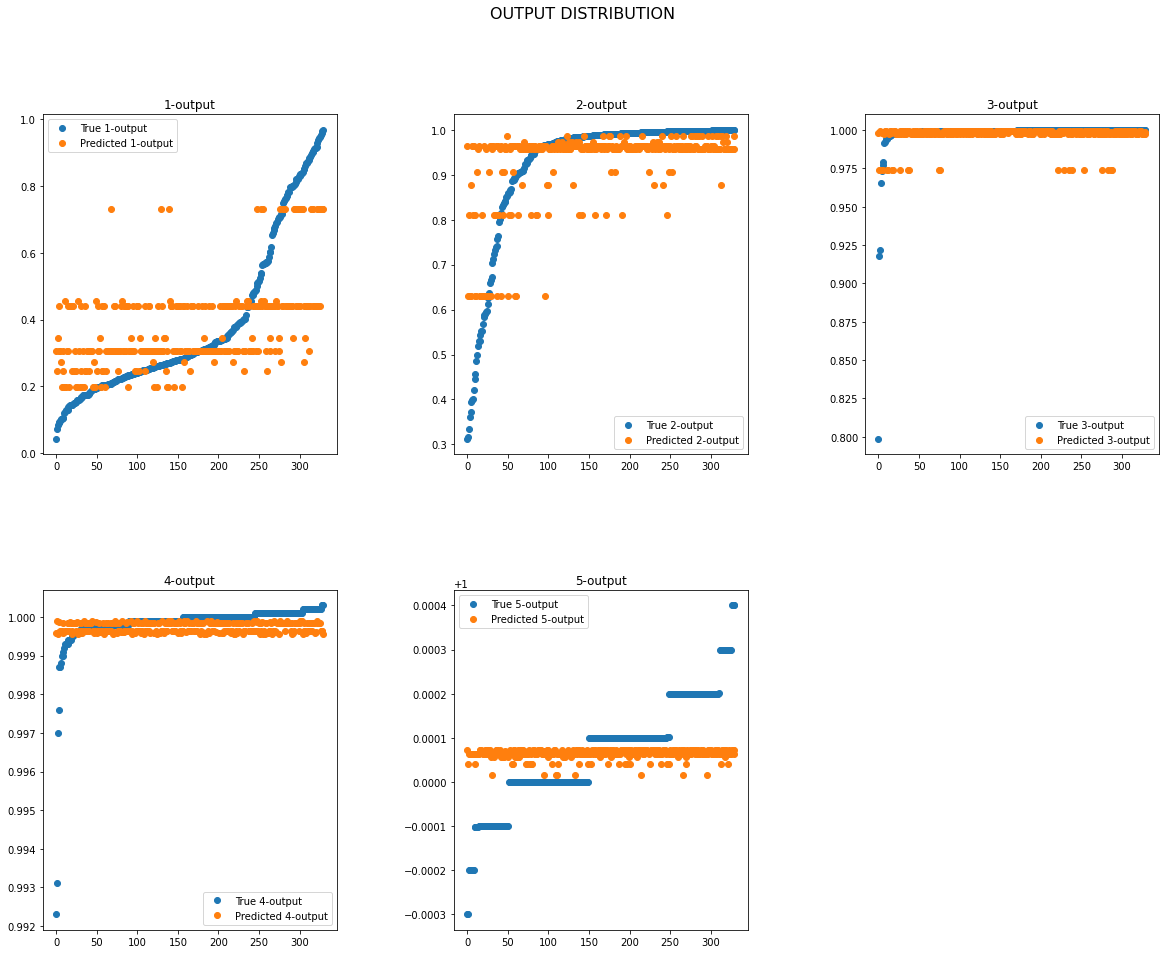

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.17521198148377276
Error is 0.12954751301345704
RMSE is 0.11759592810438212)


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [0.12305592 0.12063147 0.10574195 0.10887077 0.12160717]
Cross validation RMSE 0.11598145569699743


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = RFE(model, n_features_to_select=20, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model = RandomForestRegressor()
params = {
    'max_depth': [10],
    'min_samples_leaf': [3],
    'n_estimators': [700],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           n_jobs=-1, verbose=1, scoring = "neg_root_mean_squared_error")
grid_search.fit(X_train_new, y_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=3, n_estimators=300)

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test, fit=False)

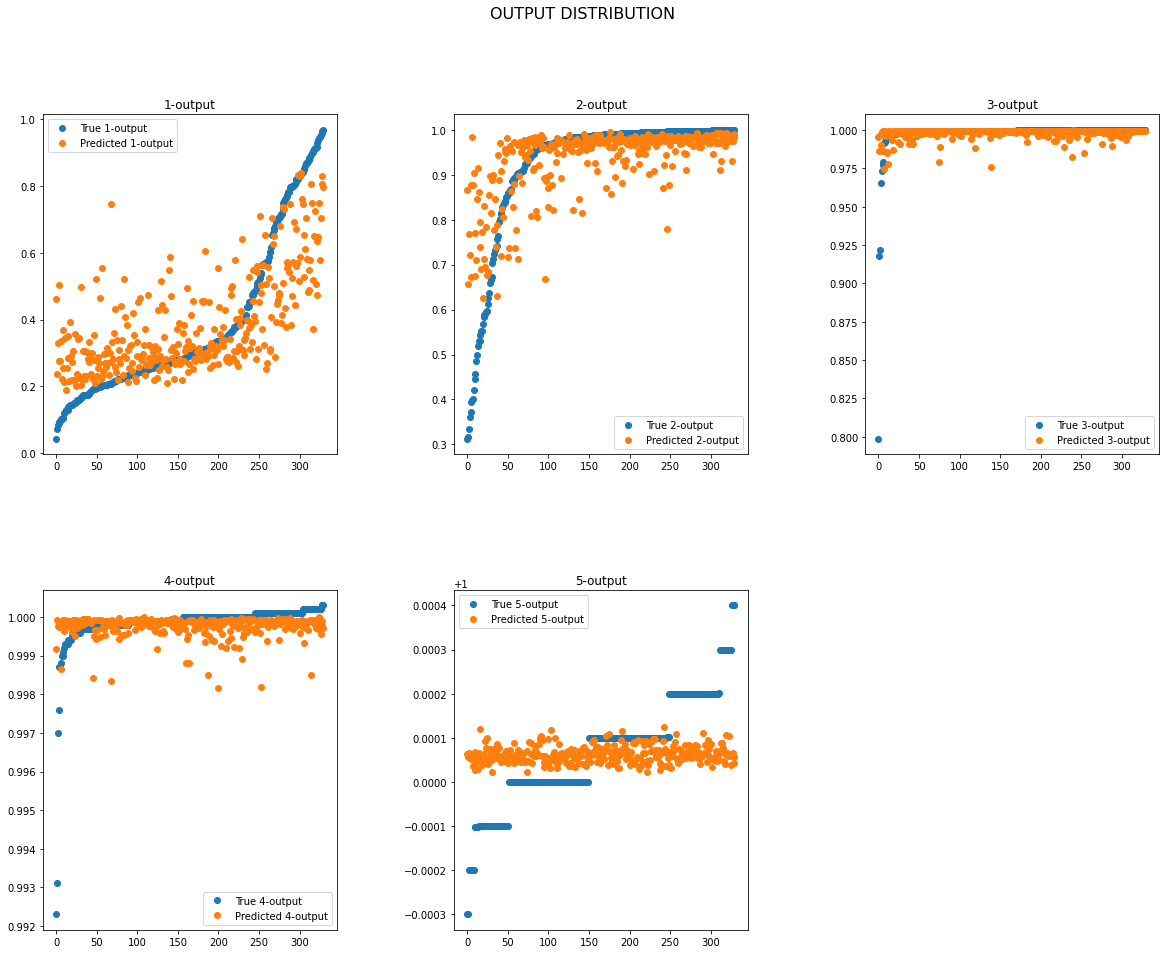

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.448593101636528
Error is 0.13618858009867008
RMSE is 0.10450812129299647)


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [0.11062903 0.10689119 0.0861056  0.09749854 0.11546579]
Cross validation RMSE 0.10331803024532997


## XGB

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
model = XGBRegressor(eval_metric='rmse')
model = MultiOutputRegressor(model)
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

[21:29:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:29:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


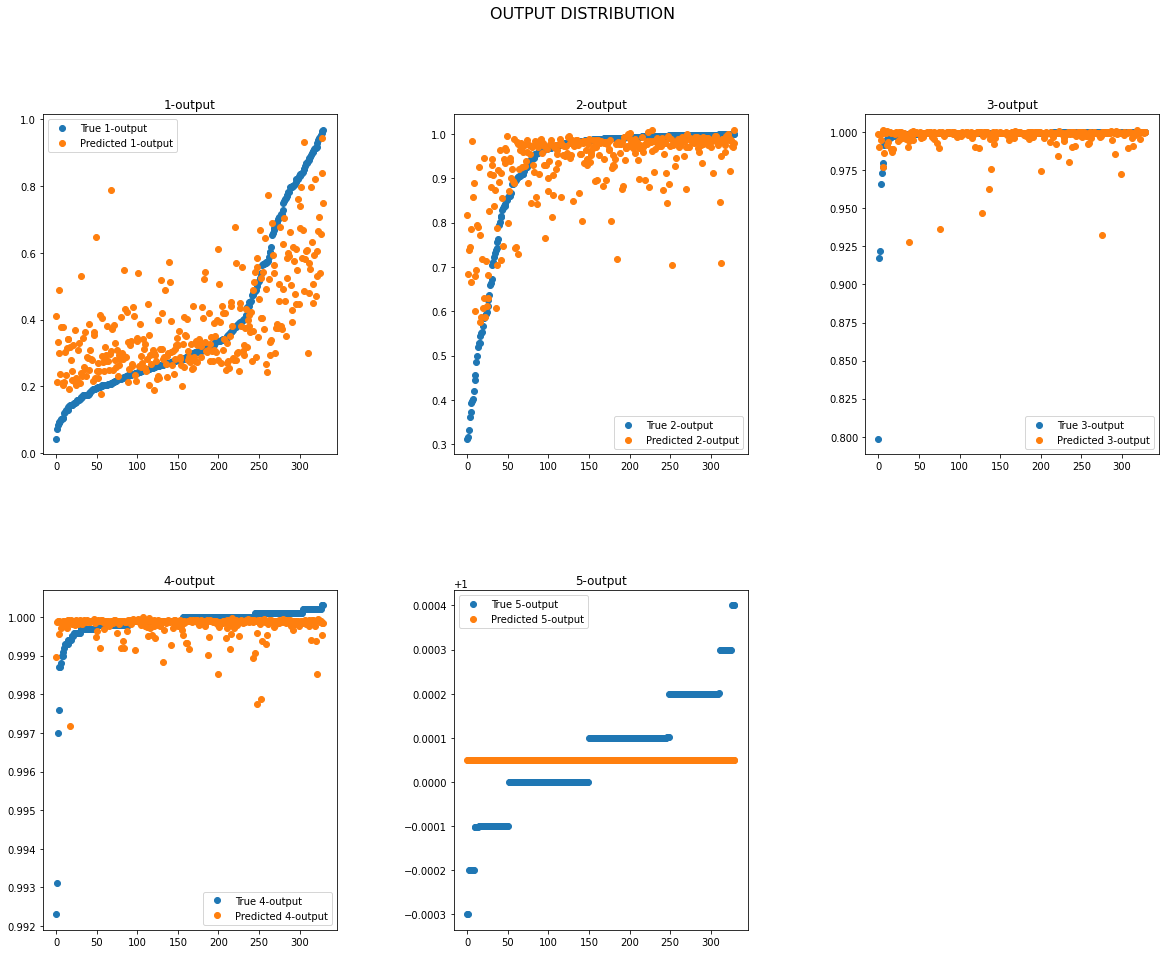

In [ ]:
draw_distribution(df_out)

In [ ]:
print(f"Coefficient of determination is {model.score(X_test_new, y_test)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is -0.0662434601077679
Error is 0.13806224863514754
RMSE is 0.10630795149463607)


In [ ]:
cv = cross_validation(model, X_test_new, y_test)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [0.10755621 0.11510996 0.11303052 0.11662006 0.11415346]
Cross validation RMSE 0.113294041630982


## CATBOOST

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm, cv as cbcv

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='MultiRMSE', logging_level='Silent', task_type="CPU")
grid = {'iterations': [2000],
        'learning_rate': [0.01],
        'depth': [5],}

In [ ]:
summary = model.select_features(
    train_dataset,
    eval_set=test_dataset,
    features_for_select='0-40',
    num_features_to_select=25,
    steps=3,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=False,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
X_train_new = X_train[summary['selected_features_names']]
X_test_new = X_test[summary['selected_features_names']]

In [ ]:
train_dataset = cb.Pool(X_train_new, y_train) 
test_dataset = cb.Pool(X_test_new, y_test)

In [ ]:
import sys
grid_search_result = model.grid_search(grid,
                                       train_dataset,
                                       search_by_train_test_split=False,
                                       log_cout=sys.stderr,
                                       verbose=False,
                                       plot=True)

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

In [ ]:
print(f"Coefficient of determination is {model.score(X_train_new, y_train)}")
print(f"Error is {error}")
print(f"RMSE is { mean_squared_error(df_out[['0.05<', '0.05 : 0.2', '0.2 : 0.5', '0.5 : 1', '1>']].sort_index().values, df_out[['0.05< pred', '0.05 : 0.2 pred', '0.2 : 0.5 pred', '0.5 : 1 pred', '1> pred']].sort_index().values, multioutput=[1, 1, 0.5, 0.1, 0.1], squared=False)})")

Coefficient of determination is 0.9205592705184681
Error is 0.1423231450421451
RMSE is 0.10018548531180028)


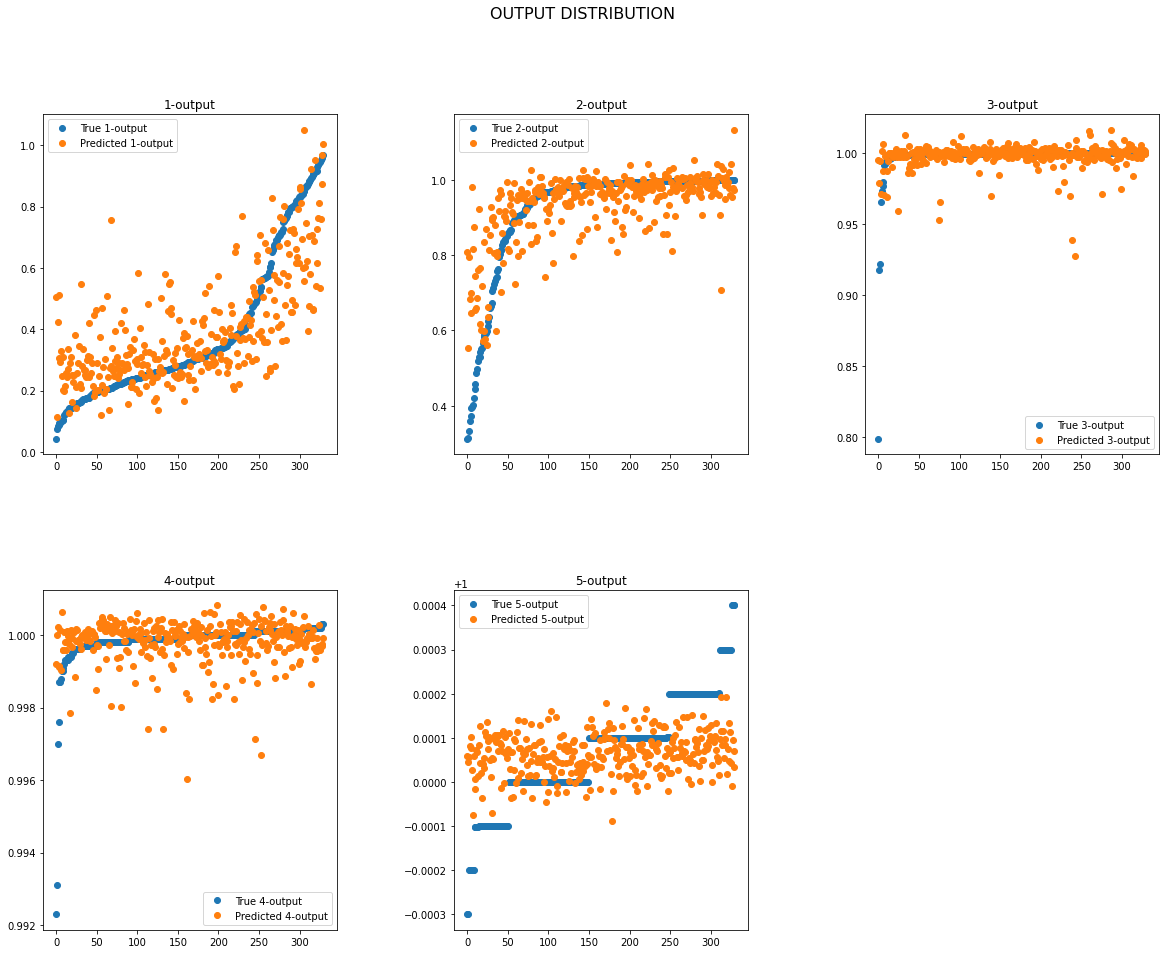

In [ ]:
draw_distribution(df_out)

In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(np.mean(cv))}")

Scores of k-block: [0.11100429 0.10753948 0.08897501 0.09394479 0.11429473]
Cross validation RMSE 0.10315166209360171


## Распределение Вейбулла

### Подготовка данных

In [ ]:
weibull_data = pd.read_csv('drive/MyDrive/Диплом/weibull_data.csv')
weibull_data = weibull_data.set_index("Deep").sort_index()
weibull_data

0.001   0.005    0.01    0.04    0.05   0.063    0.08     0.1  \
Deep                                                                      
1180.52  0.1032  0.2164  0.2726  0.6306  0.6902  0.7934  0.9076  0.9748   
1180.69  0.0970  0.1678  0.2179  0.4105  0.4404  0.5499  0.7063  0.8161   
1183.90  0.0600  0.1102  0.1387  0.2624  0.2647  0.2693  0.2880  0.3253   
1185.45  0.0539  0.0861  0.1125  0.2185  0.2424  0.2902  0.3607  0.5227   
1187.42  0.0451  0.0703  0.0880  0.1710  0.1839  0.2279  0.2973  0.4388   
...         ...     ...     ...     ...     ...     ...     ...     ...   
3833.08  0.0600  0.0958  0.1444  0.2958  0.3335  0.4124  0.5056  0.6456   
3834.61  0.0491  0.0943  0.1262  0.2827  0.3119  0.3893  0.4866  0.6249   
3835.20  0.0527  0.0931  0.1368  0.2961  0.3541  0.4453  0.5688  0.7308   
3843.44  0.0205  0.0758  0.1142  0.3406  0.4104  0.5536  0.7018  0.9453   
3844.34  0.0368  0.0834  0.1212  0.3359  0.3637  0.3996  0.4739  0.5858   

          0.125    0.16  ...   0.315     0.4     0.5    0.63     0.8     1.0  \
Deep                     ...                                                   
1180.52  0.9912  0.9947  ...  0.9981  0.9985  0.9988  0.9991  0.9996  1.0002   
1180.69  0.8754  0.9489  ...  0.9966  0.9977  0.9986  0.9993  0.9998  1.0003   
1183.90  0.4859  0.7370  ...  0.9840  0.9896  0.9910  0.9926  0.9942  1.0000   
1185.45  0.7774  0.9750  ...  0.9958  0.9965  0.9971  0.9977  0.9984  1.0003   
1187.42  0.6445  0.9239  ...  0.9976  0.9985  0.9990  0.9995  0.9998  1.0000   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
3833.08  0.8056  0.9304  ...  0.9991  0.9994  0.9996  0.9997  0.9998  1.0001   
3834.61  0.7849  0.9162  ...  0.9991  0.9996  0.9998  0.9999  1.0000  1.0001   
3835.20  0.8766  0.9625  ...  0.9987  0.9991  0.9994  0.9995  0.9997  0.9999   
3843.44  0.9824  0.9906  ...  0.9961  0.9963  0.9966  0.9969  0.9972  0.9975   
3844.34  0.8981  0.9803  ...  0.9988  0.9993  0.9995  0.9996  0.9998  1.0001   

           1.25     1.6     2.0   999.0  
Deep                                     
1180.52  1.0002  1.0002  1.0002  1.0002  
1180.69  1.0003  1.0003  1.0003  1.0003  
1183.90  1.0000  1.0000  1.0000  1.0000  
1185.45  1.0003  1.0003  1.0003  1.0003  
1187.42  1.0000  1.0000  1.0000  1.0000  
...         ...     ...     ...     ...  
3833.08  1.0001  1.0001  1.0001  1.0001  
3834.61  1.0001  1.0001  1.0001  1.0001  
3835.20  0.9999  0.9999  0.9999  0.9999  
3843.44  0.9978  0.9981  0.9984  1.0001  
3844.34  1.0001  1.0001  1.0001  1.0001  

[1097 rows x 22 columns]

### Фукнция Вейбулла и Curve

In [ ]:
from scipy.optimize import curve_fit
import math
import random

In [ ]:
def weibull(xdata, alpha, betha):
  return 1. - math.e**-((xdata / betha)**alpha)

In [ ]:
def weibull_curve(df_out)->list:
  popt_list = []
  xdata = [float(value) / 2 for value in df_out.columns]
  y_data = df_out[df_out.columns].to_numpy()
  count = 0
  for i in range(np.shape(df_out)[0]):
    current_y = y_data[i]
    popt, pcov = curve_fit(weibull, xdata, current_y, bounds=(0, [2, 100.]), maxfev=2500)
    popt_list.append(popt)
  return popt_list

def draw_weibull(xdata, ydata, popt):
  curve = []
  fig = plt.figure(figsize=(20, 25))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  for i in range(len(xdata)):
    index = random.randint(0, len(popt))
    ax = fig.add_subplot(7, 4, i + 1)
    current_y = ydata.iloc[index].values
    ax.plot(current_y, 'o', label='data')
    ax.plot(weibull(xdata, popt[index][0], popt[index][1]),'r', 
            label='fit: alpha=%5.3f, betha=%5.3f' % tuple(popt[index]))
    ax.title.set_text(f'{ydata.iloc[[index]].index.values[0]}-output')
    ax.legend(prop={'size': 8},  loc='lower right');
  curve = [weibull(xdata, i[0], i[1]) for i in popt]
  plt.show();
  return curve


def draw_single_weibull(xdata, ydata, popt):
    plt.plot(ydata, 'o', label='data')
    plt.plot(weibull(xdata, popt[0], popt[1]),'r', 
             label='fit: alpha=%5.3f, betha=%5.3f' % tuple(popt))
    plt.legend(prop={'size': 8},  loc='lower right');

In [ ]:
popt = weibull_curve(weibull_data)

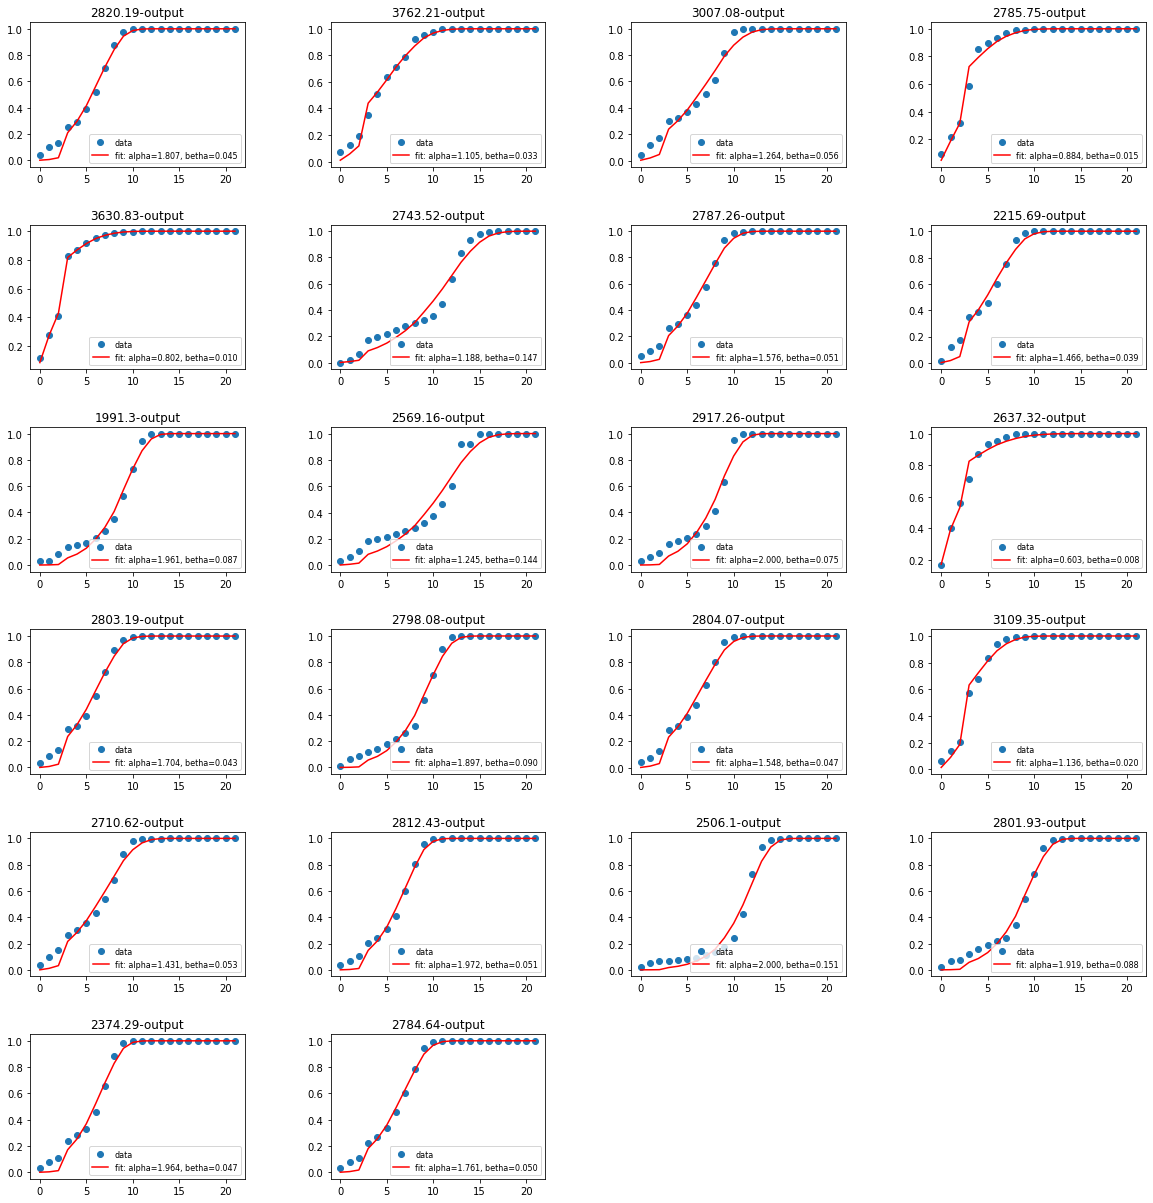

In [ ]:
xdata = [float(value) / 2 for value in weibull_data.columns]
curve = draw_weibull(xdata, weibull_data, popt)

In [ ]:
print(f"RMSE is { mean_squared_error(curve, weibull_data.values, squared=False)})")

In [ ]:
weibull_df = pd.DataFrame(popt, index=weibull_data.index.values, columns=['alpha', 'betha'])
weibull_df

### Сохранение параметров

In [ ]:
weibull_df.to_csv('drive/MyDrive/Диплом/weibull_curve.csv')

### Модели для предсказания параметров функции Вейбулла

#### Подготовка признаков и отклика

In [ ]:
df_signs = pd.read_csv('drive/MyDrive/Диплом/signs.csv')
output_weibull = pd.read_csv('drive/MyDrive/Диплом/weibull_curve.csv')
output_weibull = output_weibull.rename({'Unnamed: 0':'Deep'}, axis=1)
output_weibull = output_weibull.set_index('Deep')
output_weibull = output_weibull.sort_index()
df_signs = df_signs.set_index('Deep')
filenames = [os.path.basename(file) for file in glob.glob('drive/MyDrive/Диплом/img' + '/*')]
filenames_cropped = [crop_filename(filename) for filename in filenames]
dupes = get_dupes(filenames_cropped)
df_signs = df_signs.loc[~df_signs.index.isin(dupes)]
output_weibull

alpha     betha
Deep                       
1180.52  0.871732  0.017667
1180.69  1.019373  0.033785
1183.90  1.512671  0.070667
1185.45  2.000000  0.053058
1187.42  2.000000  0.060005
...           ...       ...
3833.08  1.419299  0.046357
3834.61  1.469495  0.048223
3835.20  1.522071  0.041929
3843.44  1.867828  0.033880
3844.34  1.499192  0.045334

[1097 rows x 2 columns]

In [ ]:
output_crop = pd.read_csv('drive/MyDrive/Диплом/output.csv')
output_crop.set_index('Deep', inplace=True)
output_crop

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>
Deep                                                   
2906.71  0.1999      0.8895     1.0000   1.0002  1.0003
2908.42  0.1681      0.9667     0.9999   1.0000  1.0000
2914.57  0.2239      0.9710     0.9996   0.9998  1.0000
2916.06  0.1783      0.9505     0.9998   1.0000  1.0001
2917.26  0.1809      0.9478     0.9998   1.0000  1.0002
...         ...         ...        ...      ...     ...
3245.94  0.6042      0.9800     0.9994   0.9998  1.0001
3246.33  0.7393      0.9969     0.9999   1.0000  1.0001
3247.61  0.5669      0.9909     0.9995   0.9997  0.9999
3248.51  0.2337      0.6300     0.9989   0.9995  0.9998
3249.38  0.2840      0.7200     0.9996   0.9999  1.0001

[1097 rows x 5 columns]

#### Подготовка выборки и функций

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_signs, 
                                                    output_weibull, test_size=0.30, 
                                                    random_state=101)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(767, 41) (330, 41) (767, 2) (330, 2)


#### Регресионная модель для прогнозирования параметров

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


reg = LinearRegression()
model = RFE(reg, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

In [ ]:
output_crop = output_crop.sort_index()
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()
out_list = df_out[['alpha pred', 'betha pred']]
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list.values.tolist()]
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]
print(f"ERROR IS {get_error(predict_list, error_data.values.tolist())}")

ERROR IS 0.10667284164346034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in power



In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False, multioutput=[0.4, 0.3, 0.1, 0.1, 0.1])}")

ERROR IS 0.1152885175462898
RMSE IS 0.17009238657412784


In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

Scores of k-block: [nan nan nan nan nan]
Cross validation RMSE nan


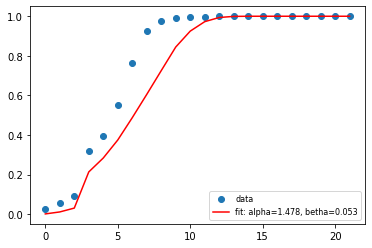

In [ ]:
xdata = [float(value) / 2 for value in weibull_data.columns]
draw_single_weibull(xdata, weibull_data[weibull_data.index==df_out[['alpha pred', 'betha pred']].iloc[0].name].values[0], df_out[['alpha pred', 'betha pred']].values[0])

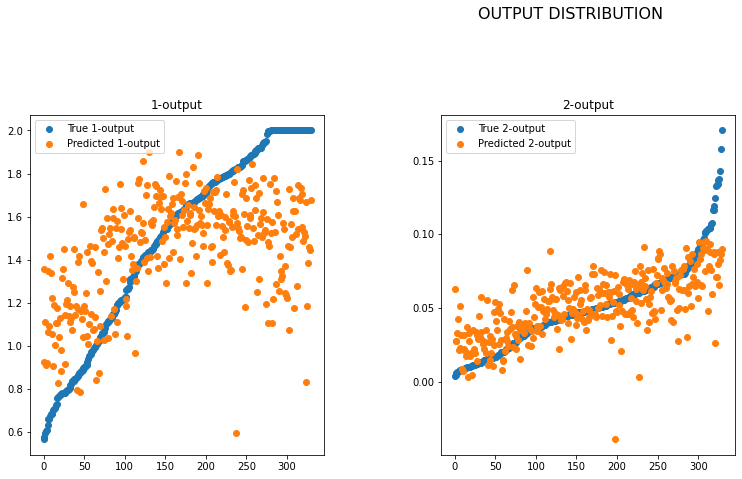

In [ ]:
draw_distribution(df_out)

#### Регресионная модель с регуляризацией Lasso

In [ ]:
from sklearn.linear_model import MultiTaskLasso
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt


reg = MultiTaskLasso()
model = RFE(reg, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

In [ ]:
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()
out_list = df_out[['alpha pred', 'betha pred']].values.tolist()
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list]
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]
print(f"ERROR IS {get_error(predict_list, error_data.values.tolist())}")

ERROR IS 0.1258785729182408


In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False, multioutput=[0.4, 0.3, 0.1, 0.1, 0.1])}")

ERROR IS 0.07402090232123344
RMSE IS 0.1479256472494874


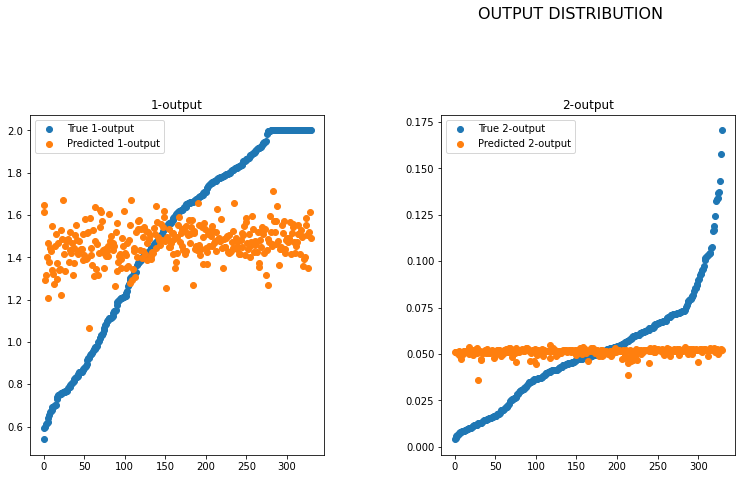

In [ ]:
draw_distribution(df_out)

In [ ]:
cv = cross_validation(model, X_train, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(mean(cv))}")

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Scores of k-block: [nan nan nan nan nan]
Cross validation RMSE nan


#### DECISISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
model = RFE(model, n_features_to_select=30, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model = DecisionTreeRegressor()
params = {
    'max_depth': [5],
    'min_samples_leaf': [20],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")
grid_search.fit(X_train_new, y_train)
model = grid_search.best_estimator_

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test, fit=False)

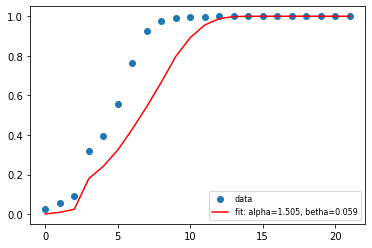

In [ ]:
xdata = [float(value) / 2 for value in weibull_data.columns]
draw_single_weibull(xdata, weibull_data[weibull_data.index==df_out[['alpha pred', 'betha pred']].iloc[0].name].values[0], df_out[['alpha pred', 'betha pred']].values[0])

In [ ]:
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()

In [ ]:
out_list = df_out[['alpha pred', 'betha pred']].values.tolist()

In [ ]:
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list]

In [ ]:
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]

In [ ]:
get_error(predict_list, error_data.values.tolist())

0.11916892151534171

In [ ]:
print(f"RMSE is { mean_squared_error(error_data.values.tolist(), predict_list, squared=False)})")

RMSE is 0.10282520038870459)


In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False)}")

ERROR IS 0.0915044432260978
RMSE IS 0.08854397133548825


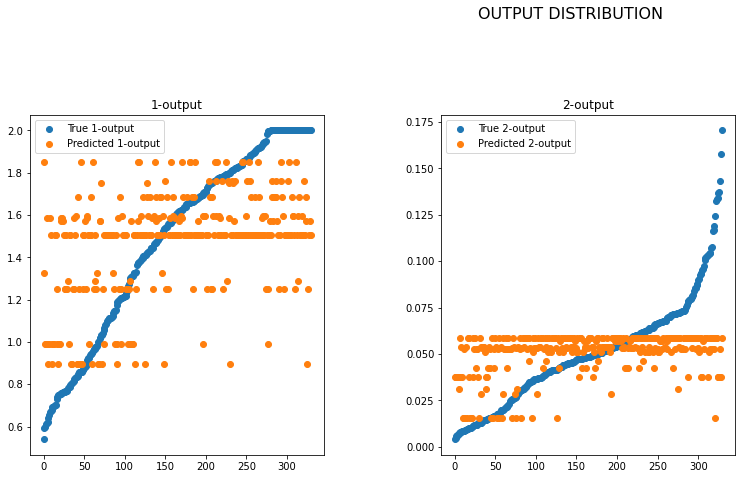

In [ ]:
draw_distribution(df_out)

#### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = RFE(model, n_features_to_select=25, step=1)
model.fit(X_train, y_train)
X_train_new = X_train[X_train.columns[model.get_support()]]
X_test_new = X_test[X_test.columns[model.get_support()]]

In [ ]:
model = RandomForestRegressor()
params = {
    'max_depth': [10],
    'n_estimators': [400],
    'min_samples_leaf': [5],
}
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "neg_mean_squared_error")
grid_search.fit(X_train_new, y_train)
model = grid_search.best_estimator_

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=5, n_estimators=400)

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test, fit=False)

In [ ]:
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()

In [ ]:
out_list = df_out[['alpha pred', 'betha pred']].values.tolist()

In [ ]:
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list]

In [ ]:
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]

In [ ]:
get_error(predict_list, error_data.values.tolist())

0.10421695237109148

In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False)}")

ERROR IS 0.09087582568033364
RMSE IS 0.08767982991088044


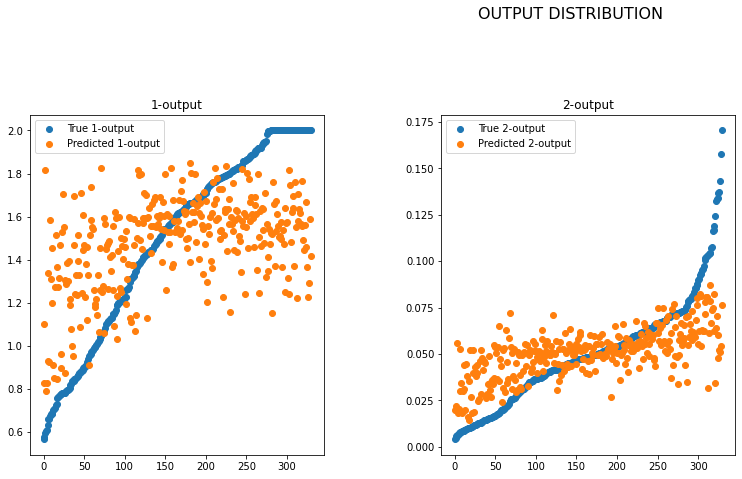

In [ ]:
draw_distribution(df_out)

## CATBOOST

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm, cv as cbcv

In [ ]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [ ]:
model = cb.CatBoostRegressor(loss_function='MultiRMSE', logging_level='Silent', task_type="CPU", n_estimators=2000)
grid = {'iterations': [2000],
        'learning_rate': [0.01],
        'depth': [5],}

In [ ]:
summary = model.select_features(
    train_dataset,
    eval_set=test_dataset,
    features_for_select='0-40',
    num_features_to_select=25,
    steps=3,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=False,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
X_train_new = X_train[summary['selected_features_names']]
X_test_new = X_test[summary['selected_features_names']]

In [ ]:
train_dataset = cb.Pool(X_train_new, y_train) 
test_dataset = cb.Pool(X_test_new, y_test)

In [ ]:
import sys
grid_search_result = model.grid_search(grid,
                                       train_dataset,
                                       search_by_train_test_split=False,
                                       log_cout=sys.stderr,
                                       verbose=False,
                                       plot=True)

In [ ]:
model, df_out, prediction, error = train_model(model, X_train_new, y_train, X_test_new, y_test)

In [ ]:
output_crop = output_crop.sort_index()
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()
out_list = df_out[['alpha pred', 'betha pred']]
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list.values.tolist()]
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]
print(f"ERROR IS {get_error(predict_list, error_data.values.tolist())}")

ERROR IS 0.11025706685312056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in power



In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False)}")

ERROR IS 0.11483371233988658
RMSE IS 0.09409056041658154


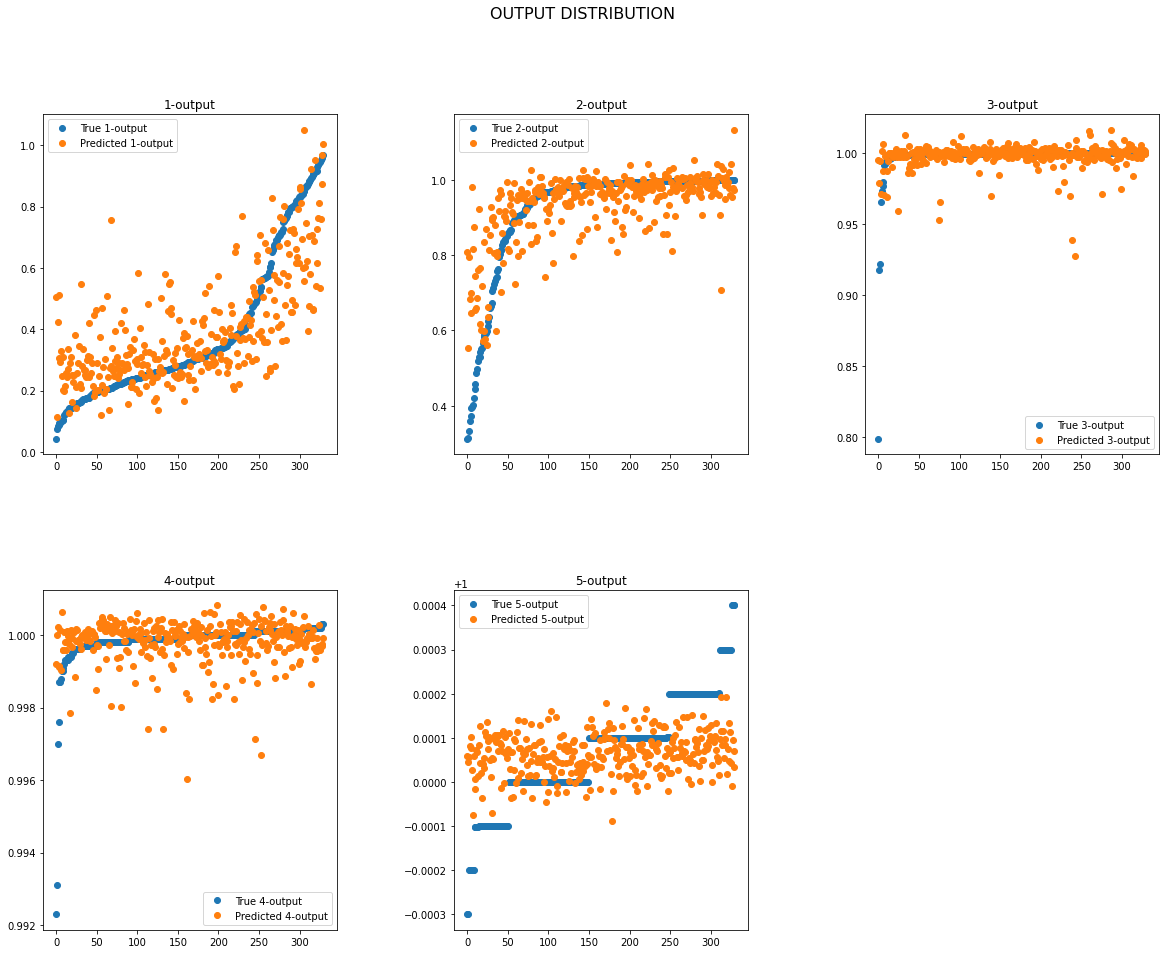

In [ ]:
draw_distribution(df_out)

In [ ]:
cv = cross_validation(model, X_train_new, y_train)
print(f'Scores of k-block: {abs(cv)}')
print(f"Cross validation RMSE {abs(np.mean(cv))}")

Scores of k-block: [0.11100429 0.10753948 0.08897501 0.09394479 0.11429473]
Cross validation RMSE 0.10315166209360171


## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
model = XGBRegressor(eval_metric='rmse')
model = MultiOutputRegressor(model)
model, df_out, prediction, error = train_model(model, X_train, y_train, X_test, y_test)

[08:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
output_crop = output_crop.sort_index()
weibull_data = weibull_data.sort_index()
df_out = df_out.sort_index()
out_list = df_out[['alpha pred', 'betha pred']]
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in out_list.values.tolist()]
error_data = weibull_data[weibull_data.index.isin(df_out.index.values)]
print(f"ERROR IS {get_error(predict_list, error_data.values.tolist())}")

ERROR IS 0.11269428052720852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in power



In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=X_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.0', '1.6']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False)}")

ERROR IS 0.10941764969280204
RMSE IS 0.09324527556578935


# Нейронная сеть

In [ ]:
import pathlib
import os
import glob
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense, Flatten
from keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.data import Dataset
import tensorflow_datasets as tfds


def load_dataset(top_dir="drive/MyDrive/Диплом/img_cropped"):
  images_dataset = {}
  deep_list = get_deep(top_dir, ext='img')
  filenames = [os.path.basename(file) for file in glob.glob(top_dir + '/*')]
  filenames_cropped = [crop_filename(filename) for filename in filenames]
  dupes = get_dupes(filenames_cropped)
  for file in filenames:
    cropped_filename = crop_filename(file)
    if float(cropped_filename) not in dupes:
      images_dataset.update({float(crop_filename(file)): 
                              np.array(Image.open(os.path.join(top_dir, file)))})
  images_dataset = {key:images_dataset[key] for key in sorted(images_dataset.keys())}
  return images_dataset

In [ ]:
images = load_dataset()
images = list(images.values())

In [ ]:
output = pd.read_csv('drive/MyDrive/Диплом/weibull_curve.csv')
df_signs = pd.read_csv('drive/MyDrive/Диплом/signs.csv')
if 'sum' in output.columns:
  output = output.drop('sum', axis=1)
output = output.rename({'Unnamed: 0':'Deep'}, axis=1)
df_signs = pd.read_csv('drive/MyDrive/Диплом/signs.csv')
filenames = [os.path.basename(file) for file in glob.glob('drive/MyDrive/Диплом/img' + '/*')]
filenames_cropped = [crop_filename(filename) for filename in filenames]
dupes = get_dupes(filenames_cropped)
if 'sum' in output.columns:
  output = output.drop('sum', axis=1)
output = output.set_index('Deep')
output = output.sort_index()
df_signs = df_signs.set_index('Deep')
df_signs = df_signs.loc[~df_signs.index.isin(dupes)]
output

alpha     betha
Deep                       
1180.52  0.871732  0.017667
1180.69  1.019373  0.033785
1183.90  1.512671  0.070667
1185.45  2.000000  0.053058
1187.42  2.000000  0.060005
...           ...       ...
3833.08  1.419299  0.046357
3834.61  1.469495  0.048223
3835.20  1.522071  0.041929
3843.44  1.867828  0.033880
3844.34  1.499192  0.045334

[1097 rows x 2 columns]

In [ ]:
images = np.array(images)
images = np.repeat(images[..., np.newaxis], 3, -1)

In [ ]:
np.shape(images)

(1097, 200, 200, 3)

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,200, 3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

normalize_layer = Normalization(mean=[0.485, 0.456, 0.406], 
                      variance=[np.square(0.299), 
                                np.square(0.224), 
                                np.square(0.225)])
augmentation_layer = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
es = EarlyStopping(monitor='val_loss', patience=10)
cb_list = [es]

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
DATASET_SIZE = 1097
train_size = int(0.7 * DATASET_SIZE)
test_size = int(0.3 * DATASET_SIZE)

dataset = Dataset.from_tensor_slices((images, output.values))
dataset = dataset.map(lambda x, y: augmentation_layer(x, y))
dataset = dataset.shuffle(64)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
resnet_model = Sequential([normalize_layer,
                           pretrained_model,
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(2)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, output, test_size=0.33)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(734, 200, 200, 3) (363, 200, 200, 3) (734, 2) (363, 2)


In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=2E-4), loss='mean_squared_error', metrics=['mean_squared_error'])
resnet_model.build(input_shape=(None, 200, 200, 3))
resnet_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 200, 200, 3)      0         
 ion)                                                            
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dense_19 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [ ]:
with tf.device('/device:GPU:0'):
  history = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=cb_list, batch_size=32)

Epoch 1/100
23/23 [==============================] - 11s 206ms/step - loss: 0.7686 - mean_squared_error: 0.7686 - val_loss: 0.2083 - val_mean_squared_error: 0.2083
Epoch 2/100
23/23 [==============================] - 3s 145ms/step - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 0.1069 - val_mean_squared_error: 0.1069
Epoch 3/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0908 - val_mean_squared_error: 0.0908
Epoch 4/100
23/23 [==============================] - 3s 132ms/step - loss: 0.0765 - mean_squared_error: 0.0765 - val_loss: 0.1127 - val_mean_squared_error: 0.1127
Epoch 5/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0912 - mean_squared_error: 0.0912 - val_loss: 0.1227 - val_mean_squared_error: 0.1227
Epoch 6/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0887 - val_mean_squared_error: 0.0887
Epoch 7/100
23/23 [==

In [ ]:
res = resnet_model.predict(X_test)

In [ ]:
np.savetxt('drive/MyDrive/Диплом/result_neural_weibull.txt', res)

In [ ]:
predict = np.loadtxt('drive/MyDrive/Диплом/result_neural_weibull.txt')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predict, y_test.values)

0.07466013510993777

In [ ]:
predict_list = [weibull(np.array(xdata), i[0], i[1]) for i in predict]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [ ]:
temp_df = pd.DataFrame(predict_list, columns=weibull_data.columns, index=y_test.index.values).sort_index().dropna()
print(f"ERROR IS {get_error(temp_df[['0.05', '0.2', '0.5', '1.25', '2.0']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values)}")
print(f"RMSE IS {mean_squared_error(temp_df[['0.05', '0.2', '0.5', '1.25', '2.0']].values, output_crop[output_crop.index.isin(temp_df.index.values)].values, squared=False)}")

ERROR IS 0.08495612263491548
RMSE IS 0.17469382177504963


In [ ]:
temp_df

0.001     0.005      0.01      0.04      0.05     0.063      0.08  \
1183.90  0.004920  0.026955  0.055520  0.220893  0.271291  0.332815  0.406537   
1239.25  0.001399  0.016380  0.046678  0.330004  0.430995  0.552313  0.686256   
1951.85  0.004606  0.073407  0.225163  0.942503  0.985202  0.998168  0.999929   
1973.82  0.000596  0.011826  0.042249  0.433563  0.577127  0.733597  0.872863   
1986.58  0.000295  0.005675  0.020161  0.229614  0.325147  0.452069  0.606864   
...           ...       ...       ...       ...       ...       ...       ...   
3571.10  0.020321  0.183750  0.419993  0.980174  0.995424  0.999439  0.999973   
3618.48  0.000444  0.005078  0.014450  0.112169  0.153673  0.210875  0.288338   
3629.76  0.014653  0.043849  0.069800  0.171721  0.197307  0.227250  0.262155   
3654.94  0.000490  0.003801  0.009162  0.052355  0.068952  0.091435  0.121885   
3763.59  0.000052  0.000891  0.003036  0.034781  0.051197  0.076077  0.113779   

              0.1     0.125      0.16  ...     0.315       0.4       0.5  \
1183.90  0.483962  0.567781  0.664031  ...  0.893776  0.944477  0.974409   
1239.25  0.804477  0.899531  0.965097  ...  0.999924  0.999999  1.000000   
1951.85  0.999999  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1973.82  0.955981  0.991167  0.999438  ...  1.000000  1.000000  1.000000   
1986.58  0.755229  0.880178  0.964607  ...  0.999991  1.000000  1.000000   
...           ...       ...       ...  ...       ...       ...       ...   
3571.10  0.999999  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
3618.48  0.379375  0.487770  0.621868  ...  0.933787  0.979744  0.995782   
3629.76  0.298583  0.338812  0.387732  ...  0.543001  0.602863  0.659476   
3654.94  0.158600  0.205015  0.269602  ...  0.524927  0.635374  0.738257   
3763.59  0.164159  0.233717  0.337768  ...  0.745275  0.876019  0.954913   

             0.63       0.8       1.0      1.25       1.6       2.0  999.0  
1183.90  0.990787  0.997626  0.999530  0.999940  0.999997  1.000000    1.0  
1239.25  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  
1951.85  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  
1973.82  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  
1986.58  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  
...           ...       ...       ...       ...       ...       ...    ...  
3571.10  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000    1.0  
3618.48  0.999574  0.999986  1.000000  1.000000  1.000000  1.000000    1.0  
3629.76  0.717369  0.774665  0.824188  0.868381  0.909700  0.939498    1.0  
3654.94  0.834535  0.912712  0.960829  0.986491  0.997244  0.999603    1.0  
3763.59  0.990592  0.999194  0.999974  1.000000  1.000000  1.000000    1.0  

[109 rows x 22 columns]

In [ ]:
output_weibull = pd.read_csv('drive/MyDrive/Диплом/output.csv')
output_weibull = output_weibull.rename({'Unnamed: 0':'Deep'}, axis=1)
output_weibull = output_weibull.set_index('Deep')
output_weibull = output_weibull.sort_index()
np.shape(output_weibull)

(1097, 5)

In [ ]:
output_weibull

0.05<  0.05 : 0.2  0.2 : 0.5  0.5 : 1      1>
Deep                                                   
1180.52  0.6902      0.9967     0.9988   0.9996  1.0002
1180.69  0.4404      0.9861     0.9986   0.9998  1.0003
1183.90  0.2647      0.8812     0.9910   0.9942  1.0000
1185.45  0.2424      0.9930     0.9971   0.9984  1.0003
1187.42  0.1839      0.9891     0.9990   0.9998  1.0000
...         ...         ...        ...      ...     ...
3833.08  0.3335      0.9842     0.9996   0.9998  1.0001
3834.61  0.3119      0.9819     0.9998   1.0000  1.0001
3835.20  0.3541      0.9900     0.9994   0.9997  0.9999
3843.44  0.4104      0.9939     0.9966   0.9972  1.0001
3844.34  0.3637      0.9951     0.9995   0.9998  1.0001

[1097 rows x 5 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, output_weibull, test_size=0.33)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(734, 200, 200, 3) (363, 200, 200, 3) (734, 5) (363, 5)


In [ ]:
pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(200,200, 3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

normalize_layer = Normalization(mean=[0.485, 0.456, 0.406], 
                      variance=[np.square(0.299), 
                                np.square(0.224), 
                                np.square(0.225)])
augmentation_layer = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
resnet_model = Sequential([normalize_layer,
                           pretrained_model,
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(5)])

In [ ]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

resnet_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=5E-4), loss=root_mean_squared_error, metrics=[root_mean_squared_error])
resnet_model.build(input_shape=(None, 200, 200, 3))
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 200, 200, 3)      0         
 ion)                                                            
                                                                 
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 43,709,829
Trainable params: 1,051,653
Non-trainable params: 42,658,176
__________________________________

In [ ]:
history = resnet_model.fit(x=X_train, y=y_train,validation_data=(X_test, y_test), epochs=100, callbacks=cb_list, batch_size=32)

Epoch 1/100
23/23 [==============================] - 12s 297ms/step - loss: 0.0877 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0895 - val_root_mean_squared_error: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 5s 231ms/step - loss: 0.0850 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0873 - val_root_mean_squared_error: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 6s 271ms/step - loss: 0.0830 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0873 - val_root_mean_squared_error: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 5s 237ms/step - loss: 0.0814 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0875 - val_root_mean_squared_error: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 5s 241ms/step - loss: 0.0801 - root_mean_squared_error: 0.0000e+00 - val_loss: 0.0863 - val_root_mean_squared_error: 0.0000e+00
Epoch 6/100
23/23 [==============================] - 6s 244ms/step - loss: 0.0791 - root_mean_

In [ ]:
res = resnet_model.predict(X_test)

In [ ]:
print(f"RMSE IS {mean_squared_error(res, y_test.values, squared=False)}")

RMSE IS 0.07451233112459375


# Визуализация результатов исследования

In [ ]:
reg = [0.371, 0.117, 0.096, 0.103, 0.102]
lasso = [0.144,	0.142, 0.121,	0.138,	0.135]
ridge = [0.144,	0.142,	0.120,	0.138,	0.135]
dt = [0.121,	0.120,	0.105,	0.109,	0.121]
forest = [0.111,	0.107,	0.086,	0.097,	0.115] 
catboost = [0.109,	0.109,	0.086,	0.093,	0.099]


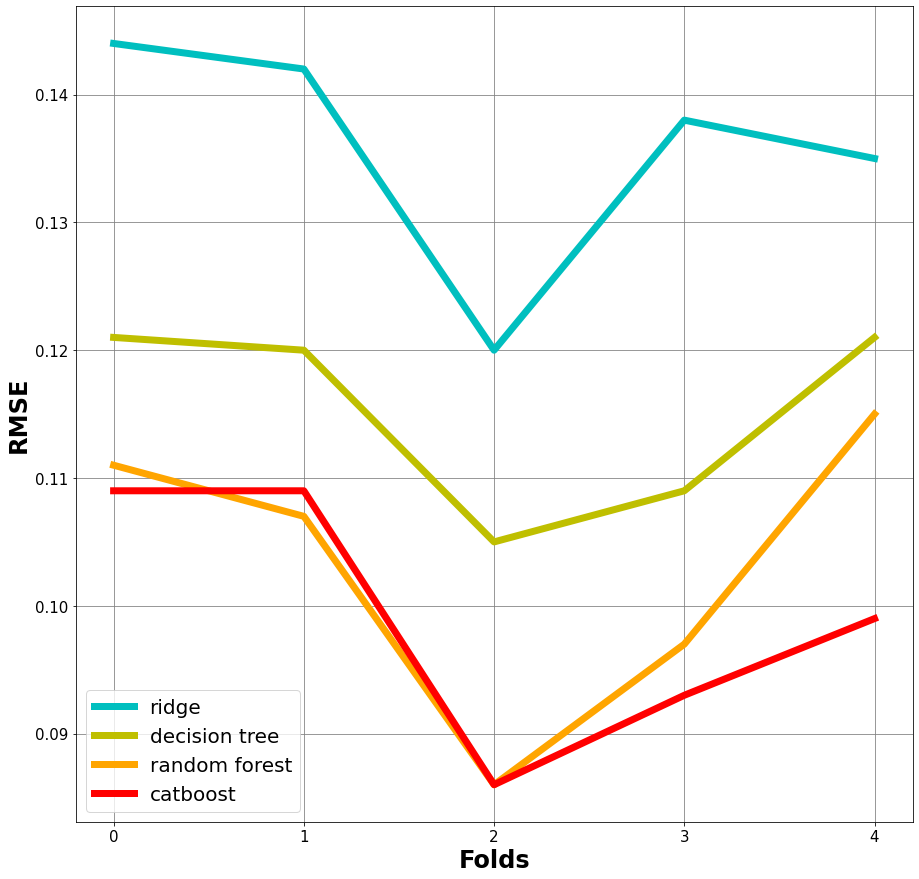

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(ridge, 'c', lw=7, label='ridge')
plt.plot(dt, 'y',  lw=7,label='decision tree')
plt.plot(forest, 'orange',  lw=7,label='random forest')
plt.plot(catboost, 'r',  lw=7,label='catboost')
plt.ylabel('RMSE', fontsize=24, fontweight='bold')
plt.xticks(np.arange(0, 5, step=1), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Folds', fontsize=24, fontweight='bold')
plt.grid(color='grey', fillstyle='full')
plt.legend(prop={'size':20});

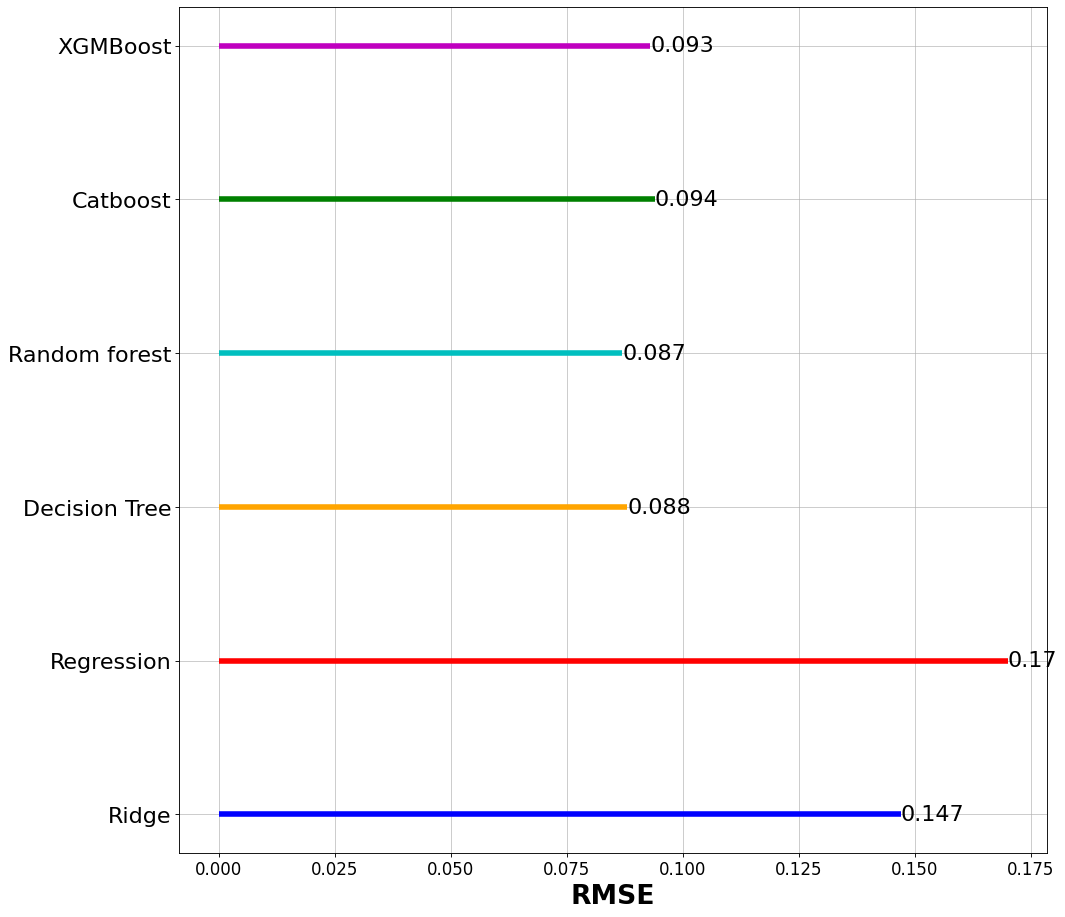

In [ ]:
df = pd.DataFrame(data={'Ridge': 0.147, 'Regression':0.170, 'Decision Tree':0.088, 'Random forest':0.087, 'Catboost':0.094, 'XGMBoost':0.093}, index=[0])

plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.columns, xmin=0, xmax=df.values, colors=['b', 'r', 'orange', 'c', 'g', 'm'], lw=5)
for x, y, tex in zip(pd.Series(df.values[0]), df.columns, pd.Series(df.values[0])):
    t = plt.text(x, y, round(tex, 3), fontdict={'color':'black', 'size':20},
                 verticalalignment='center')
plt.yticks(fontsize=20);
plt.xticks(fontsize=15);
plt.xlabel("RMSE", fontsize=24, fontweight='bold')
plt.grid(alpha=0.7)

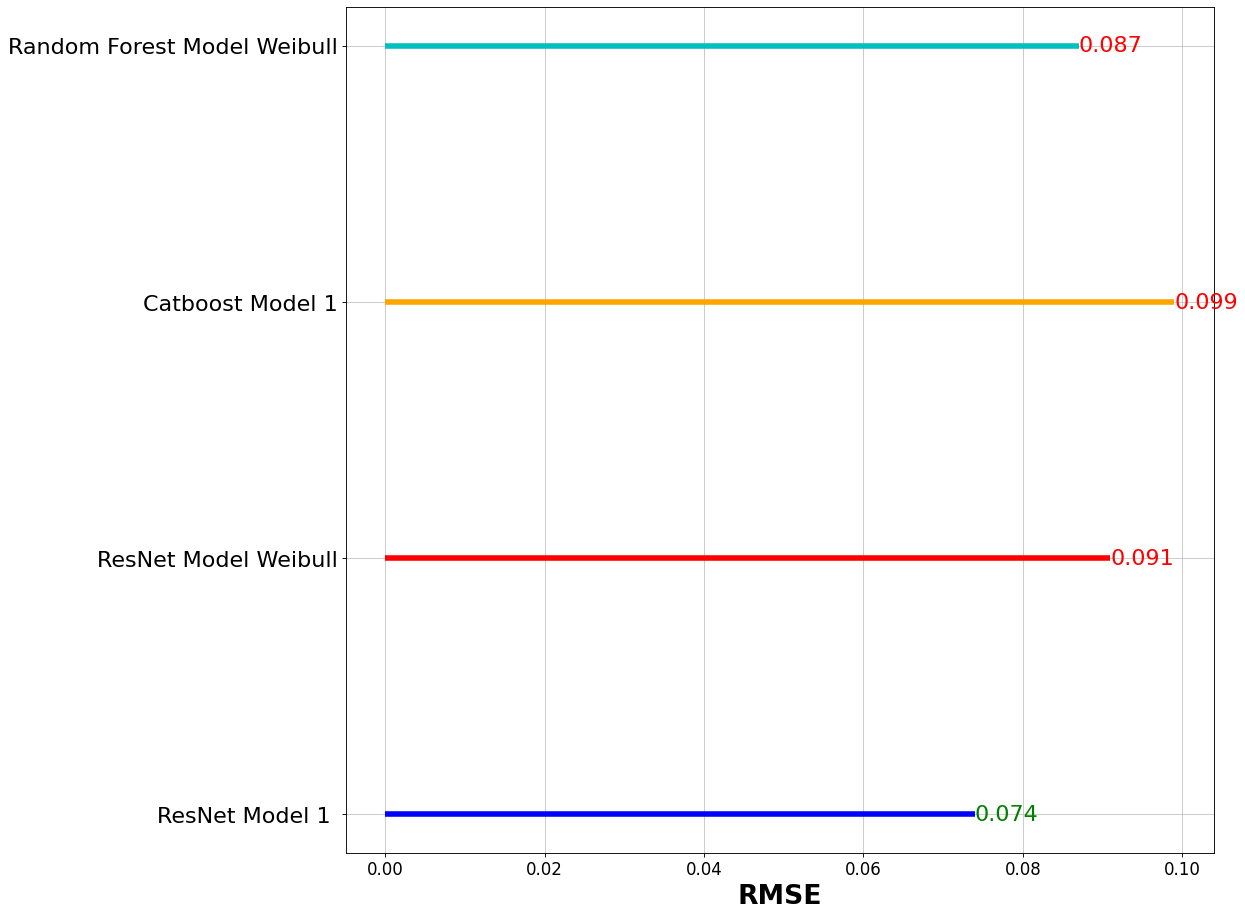

In [ ]:
df = pd.DataFrame(data={'ResNet Model 1 ': 0.074, 'ResNet Model Weibull':0.091, 'Catboost Model 1':0.099, 'Random Forest Model Weibull':0.087}, index=[0])
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df.columns, xmin=0, xmax=df.values, colors=['b', 'r', 'orange', 'c', 'g', 'm'], lw=5)


for x, y, tex in zip(pd.Series(df.values[0]), df.columns, pd.Series(df.values[0])):
    t = plt.text(x, y, round(tex, 3), fontdict={'color':'red' if x >= 0.079 else 'green', 'size':20},
                 verticalalignment='center')


plt.yticks(fontsize=20);
plt.xticks(fontsize=15);
plt.xlabel("RMSE", fontsize=24, fontweight='bold')
plt.grid(alpha=0.7)